Notebook adaptado del curso “Diplomatura en Inteligencia Artificial y Ciencia de Datos” dictado por la ECyT-UNSAM en el marco del plan Argentina Programa 4.0

 # Modelos lineales de regresión

Los modelos son expresiones matemáticas más o menos simples (depende de la familia de modelos que se elija utilizar), que describen algún aspecto de los datos.
La más conocida y sencilla de modelos, pero a la vez muy poderosa y versatil: los modelos lineales de regresión.
- Los modelos lineales:
  - Entre los modelos más simples que podemos imaginar, pero extremadamente comunes y útiles.
  - Fáciles de entrenar e interpretar.
  - En la versión múltiple, son poderosos y versátiles.
  
Un modelo de regresión es aquel en el que se busca:
- Describir el comportamiento de una variable (o un conjunto de variables) contínua a partir de otras variables del dataset.
 - La variable que se busca describir (o predecir) se suele llamar variable objetivo (target).
   - Las variables a partir de las cuales se busca hacer esto se llaman covariables, o variables predictora, o variables independientes, regresores, features (características), etc. Como muchas cosas importantes, tiene muchos nombres.

In [ ]:
#IMPORTO LAS DISTINTAS LIBRERIAS:
#>>>>>
#Para ABRIR los archivos necesarios:
import os #Para manipular archivos y directorios.

#pandas p manipulacion y analisis de datos:
import pandas as pd

#Se requiere si o si una version mayor a Python 3.5
import sys   #es parte de la biblioteca de Python, proporciona acceso a variables
# y funciones que interactúan con el intérprete/terminal de Python. Se puede usar
#por ej. p/ obtener información sobre  el sistema operativo, entre otras cosas.
assert sys.version_info >= (3,5) #si version <, assert manda mensaje de error

# Scikit-Learn ≥0.20 is required
import sklearn #biblioteca de python proporciona herramientas eficientes para el
#análisis de datos y modelado predictivo, con algoritmos como regresión,
#clasificación, clustering, etc.
assert sklearn.__version__ >="0.20" #si version <, assert manda mensaje de error

#comunes:
import numpy as np    #permite trabajar con Matrices de N dimensiones

#SciPy se basa en NumPy para ofrecer un conjunto más avanzado y completo de herramientas,
# y funciones p/ la computación científica, permite resolver problemas matemáticos
#y de ingeniería más complejos
from scipy import stats as st  #SciPy contiene funciones matemáticas y científicas:
# muchas fórmulas y métodos q ayudan a estadísticas, optimiz., álgebra lineal, entre otros.

#Para hacer gráficos lindo:
#%matplotlib inline #comando mágico de JupyterNotebook,etc. Le dice al cuaderno q
#muestre los gráficos en la misma celda de salida (en lugar de abrir una ventana externa)
import matplotlib as mpl
import matplotlib.pyplot as plt  #el modulo mas usado de matplotlib sirve para graficar

#rc: "runtime configuration" (configuración en tiempo de ejecución) función dentro
# de matplotlib p/ config. parámetros globales de los gráficos, estilos, tamaños de fuente, colores, etc.
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Obtención y preparación de los datos.
Ejemplo: entender cómo depende el valor de venta de casas en la Ciudad de Buenos Aires de su superficie.
Vamos a trabajar con un conjunto de datos de un portal inmobiliario Properati, que hasta hace un tiempo era público. Esta versión del dataset viene de Kaggle, se modificó para hacerlo más simple.

El dataset es muy grande, así que se va a hacer limpieza y filtrado antes de pasar al modelado.

### 2. Obtención de los datos:

->Si estás local directamente con read_csv()

In [ ]:
#Desde un directorio solo si este notebok lo abris en tu compu, si no No sirve!
#df = pd.read_csv("/Users/user/Desktop/AAONuclear/properati_urquiza.csv")

-> Si estás en google colab

In [ ]:
#p/traer archivos desde nuestra página local o desde un drive:
#from google.colab import files

# SUBIMOS Y CARGAMOS EL DATASE
#files.upload() #codigo para cargar abrir archivo (da la opcion de abrir un archivo de la compu)
#libreria de colab

#podemos pedirle que nos muestre qué hay en ese directorio. El list.dir(ruta) de
# os nos devuelve una lista con todos los entradas en el directorio especificado
# por ruta. Si no le pasamos nada, usa el directorio actual de trabajo:
#print(os.listdir())


In [ ]:
#Para traer archivos de nuestro DRIVE (ideal si uso colab)
#from google.colab import auth #para autenticar el acceso a los recursos de Google
from google.colab import drive

#auth.authenticate_user() #Autentica al usuario para que Colab pueda acceder a recursos protegidos como Google Drive.
drive.mount("/content/drive") #Monta Google Drive en el entorno de Colab para que puedas acceder a tus archivos de Drive.
#!ls "/content/drive/My Drive" #Muestra los archivos y carpetas dentro de tu Google Drive usando un comando de terminal de Linux.

Mounted at /content/drive


In [ ]:
#abro el dataset y lo guardo en una variable
#al usar pandas ahora el archivo url es un dataframe que es un formato de Pandas
df = pd.read_csv('/content/drive/MyDrive/AANuclear/Data/properati_urquiza.csv')

#ejemplo para extraer dataset de github:
#df1 = pd.read_csv('https://github.com/palasatenea66/DATASETS/raw/refs/heads/main/credito.csv')

### 3. Análisis Exploratorio de Datos (Exploratory Data Analysis, EDA)  

In [ ]:
#para obtener información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7319 entries, 0 to 7318
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7319 non-null   int64  
 1   id              7319 non-null   object 
 2   ad_type         7319 non-null   object 
 3   start_date      7319 non-null   object 
 4   end_date        7319 non-null   object 
 5   created_on      7319 non-null   object 
 6   lat             7130 non-null   float64
 7   lon             7129 non-null   float64
 8   l1              7319 non-null   object 
 9   l2              7319 non-null   object 
 10  l3              7319 non-null   object 
 11  l4              0 non-null      float64
 12  l5              0 non-null      float64
 13  l6              0 non-null      float64
 14  habitaciones    5902 non-null   float64
 15  dormitorios     4082 non-null   float64
 16  baños           6428 non-null   float64
 17  sup_total       5512 non-null   f

In [ ]:
#forma de ver lo que tiene el dataset
print(f'Forma: {df.shape}') #forma del dataframe
print(f'Columnas: {df.columns}') #columnas del dataframe
df.head() #muestra las primeras 5 filas del dataframe

Forma: (7319, 25)
Columnas: Index(['Unnamed: 0', 'id', 'ad_type', 'start_date', 'end_date', 'created_on',
       'lat', 'lon', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'habitaciones',
       'dormitorios', 'baños', 'sup_total', 'sup_cubierta', 'precio', 'moneda',
       'price_period', 'título', 'tipo_propiedad', 'tipo_operac'],
      dtype='object')


,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,dormitorios,baños,sup_total,sup_cubierta,precio,moneda,price_period,título,tipo_propiedad,tipo_operac
0,147,BmRsOck/zZ0V11R0SkOQyQ==,Propiedad,2020-05-09,2020-05-23,2020-05-09,-34.568577,-58.490280,Argentina,Capital Federal,...,NaN,1.0,38.0,32.0,15000.0,ARS,NaN,Quesada 5100 6° - $ 15.000 - Departamento Al...,Departamento,Alquiler
1,895,/nEjLih7yp7XrV89xgZtdg==,Propiedad,2020-05-09,2020-08-20,2020-05-09,-34.583969,-58.475676,Argentina,Capital Federal,...,1.0,1.0,45.0,31.0,99000.0,USD,Mensual,Hermoso monoambiente en Villa Urquiza!!!,Departamento,Venta
2,896,8PD4lYgBomBvBj89HZXjew==,Propiedad,2020-05-09,2020-05-20,2020-05-09,-34.580082,-58.480896,Argentina,Capital Federal,...,NaN,1.0,62.0,45.0,158000.0,USD,NaN,La Pampa Al 5100 - U$D 158.000 - Departamento...,Departamento,Venta
3,897,Hu+uveYWZg5tPi+qlpa7eQ==,Propiedad,2020-05-09,2020-05-20,2020-05-09,-34.580082,-58.480896,Argentina,Capital Federal,...,NaN,1.0,54.0,45.0,137000.0,USD,NaN,La Pampa Al 5100 - U$D 137.000 - Departamento...,Departamento,Venta
4,898,xtkPGFK6W8yUwwXDRGohFw==,Propiedad,2020-05-09,2020-05-20,2020-05-09,-34.577644,-58.472271,Argentina,Capital Federal,...,NaN,1.0,73.0,55.0,170000.0,USD,NaN,Mariano Acha Al 1600 - U$D 170.000 - Departam...,Departamento,Venta


In [ ]:
# Ejemplo Ver las primeras 5 filas y las primeras 15 columnas
df.iloc[:5, :15]

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,l5,l6,habitaciones
0,147,BmRsOck/zZ0V11R0SkOQyQ==,Propiedad,2020-05-09,2020-05-23,2020-05-09,-34.568577,-58.490280,Argentina,Capital Federal,Villa Urquiza,NaN,NaN,NaN,NaN
1,895,/nEjLih7yp7XrV89xgZtdg==,Propiedad,2020-05-09,2020-08-20,2020-05-09,-34.583969,-58.475676,Argentina,Capital Federal,Villa Urquiza,NaN,NaN,NaN,1.0
2,896,8PD4lYgBomBvBj89HZXjew==,Propiedad,2020-05-09,2020-05-20,2020-05-09,-34.580082,-58.480896,Argentina,Capital Federal,Villa Urquiza,NaN,NaN,NaN,1.0
3,897,Hu+uveYWZg5tPi+qlpa7eQ==,Propiedad,2020-05-09,2020-05-20,2020-05-09,-34.580082,-58.480896,Argentina,Capital Federal,Villa Urquiza,NaN,NaN,NaN,1.0
4,898,xtkPGFK6W8yUwwXDRGohFw==,Propiedad,2020-05-09,2020-05-20,2020-05-09,-34.577644,-58.472271,Argentina,Capital Federal,Villa Urquiza,NaN,NaN,NaN,1.0


### 4. Preparar los datos para los algoritmos de AA

In [ ]:
#Quitemos algunas columnas con pocos datos o que no nos interesen
df = df.drop(['Unnamed: 0','lat','start_date', 'end_date', 'created_on', 'lon','price_period', 'id', 'l4','l5', 'l6'], axis=1)

In [ ]:
# 1ERO, de las variables que nos interesan vamos a sacar los valores faltantes (NaN)
df = df.dropna(subset=['precio', 'sup_total', 'sup_cubierta']) #elimina las filas en el DataFrame
# df q tienen valores NaN en al menos 1 de las columnas especificadas
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5049 entries, 0 to 7318
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ad_type         5049 non-null   object 
 1   l1              5049 non-null   object 
 2   l2              5049 non-null   object 
 3   l3              5049 non-null   object 
 4   habitaciones    4435 non-null   float64
 5   dormitorios     2989 non-null   float64
 6   baños           4789 non-null   float64
 7   sup_total       5049 non-null   float64
 8   sup_cubierta    5049 non-null   float64
 9   precio          5049 non-null   float64
 10  moneda          5040 non-null   object 
 11  título          5049 non-null   object 
 12  tipo_propiedad  5049 non-null   object 
 13  tipo_operac     5049 non-null   object 
dtypes: float64(6), object(8)
memory usage: 591.7+ KB


Ahora algunos filtros:

1. Nos quedamos solo con las casas.
2. Además, solo utilizaremos las propiedades en venta.


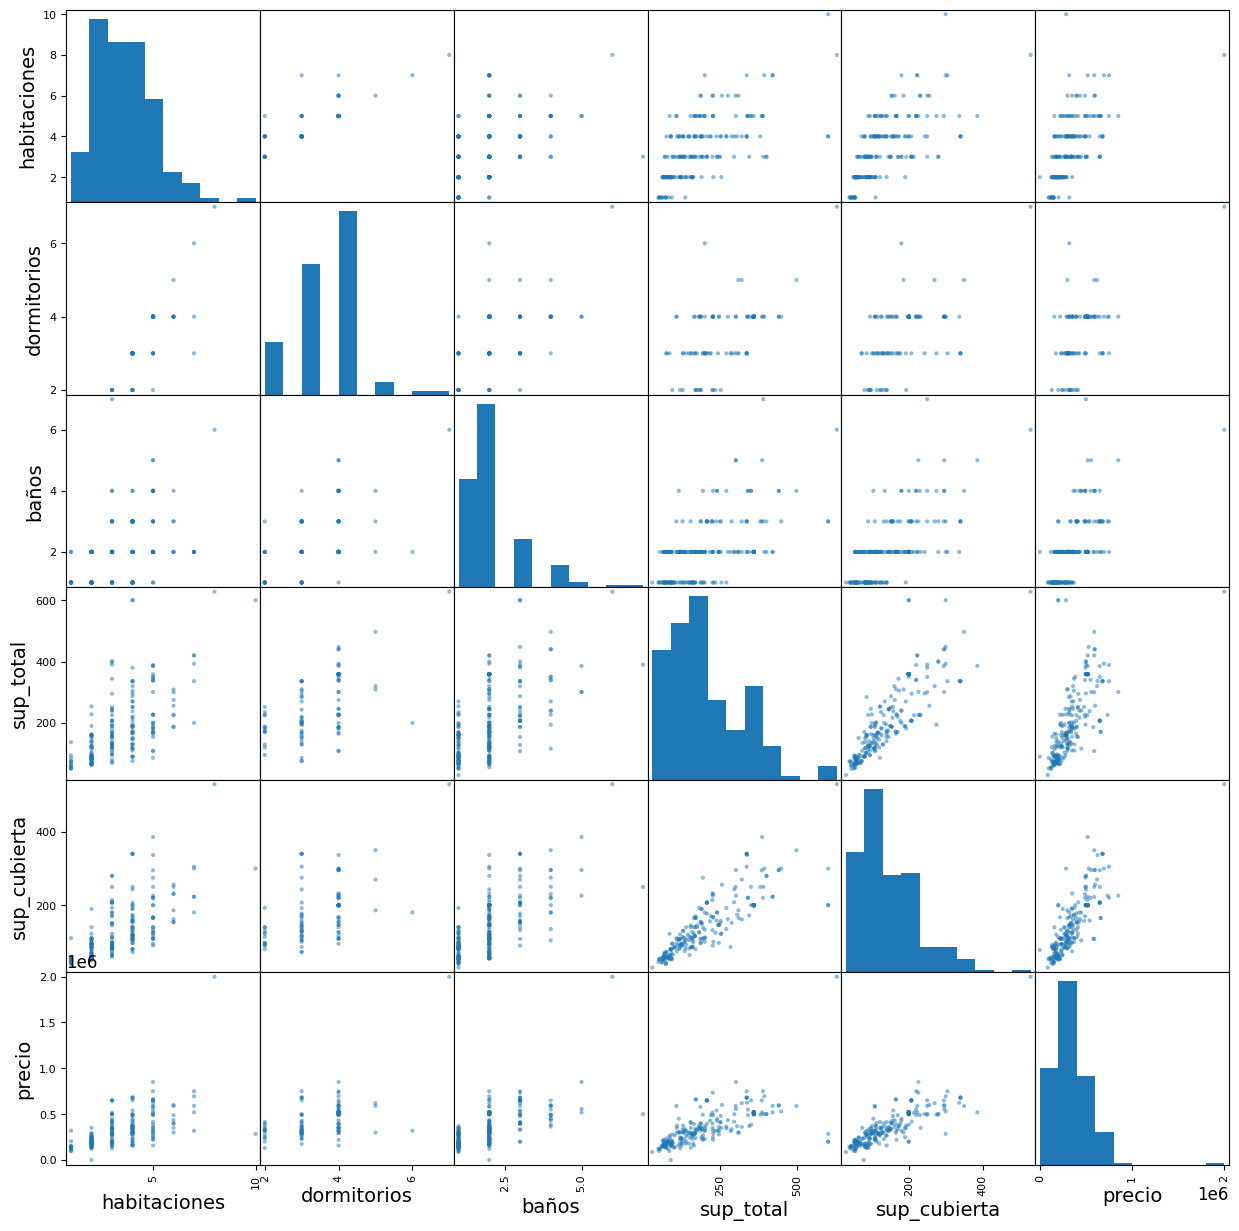

In [ ]:
df.columns
df_filtro = df[(df.tipo_propiedad == 'Casa') &
               (df.tipo_operac == 'Venta')]


_ = pd.plotting.scatter_matrix(df_filtro, figsize=(15,15))

#representación gráfica de las relaciones entre las variables numéricas.
#Genera una matriz de gráficos de dispersión (scatter plots) de todas las combinaciones
# de columnas numéricas en el DataFrame df_filtro. Un gráfico de dispersión.
#muestra la relación entre dos variables.
#el _ se usa como variable "deshechable" o temporal. Se usa para evitar que el valor
#de retorno del método (que sería una lista de ejes de gráficos, por ejemplo)
# se muestre en la salida. El objetivo es ejecutar la función para mostrar el gráfico.

Hay unas propiedades con superficie total que parecen medio ouliers, los sacamos para el ejemplo.

In [ ]:
df.columns
df_filtro = df_filtro[(df_filtro.sup_total < 350)]

df_filtro.info()

#_ = pd.plotting.scatter_matrix(df_filtro, figsize=(12, 12))

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 113 to 7282
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ad_type         188 non-null    object 
 1   l1              188 non-null    object 
 2   l2              188 non-null    object 
 3   l3              188 non-null    object 
 4   habitaciones    170 non-null    float64
 5   dormitorios     71 non-null     float64
 6   baños           182 non-null    float64
 7   sup_total       188 non-null    float64
 8   sup_cubierta    188 non-null    float64
 9   precio          188 non-null    float64
 10  moneda          187 non-null    object 
 11  título          188 non-null    object 
 12  tipo_propiedad  188 non-null    object 
 13  tipo_operac     188 non-null    object 
dtypes: float64(6), object(8)
memory usage: 22.0+ KB


Ahora tenemos un dataset mucho más manejable, ideal para mostrar el funcionamiento de los modelos lineales.

Chequeamos que los precios de la casas esten expresados de manera consistente.

In [ ]:
print(df_filtro.moneda.value_counts())
#print(df_filtro.moneda.unique()) #otra forma

moneda
USD    187
Name: count, dtype: int64


Se puede observar como el tipo de moneda es único y por lo tanto está correctamente colocado para todos los valores


### Coeficiente de Correlación de Pearson

Ahora calculemos el coeficiente de Correlación de Pearson entre la variable target y el resto de las variables numéricas. Para eso utilizamos corr() q es un método de Pandas.

El ***coeficiente de correlación de Pearson*** (también llamado r de Pearson o simplemente correlación de Pearson) es una medida estadística que indica la fuerza y dirección de la relación lineal entre dos variables numéricas. Es uno de los métodos más utilizados para cuantificar la correlación entre variables.


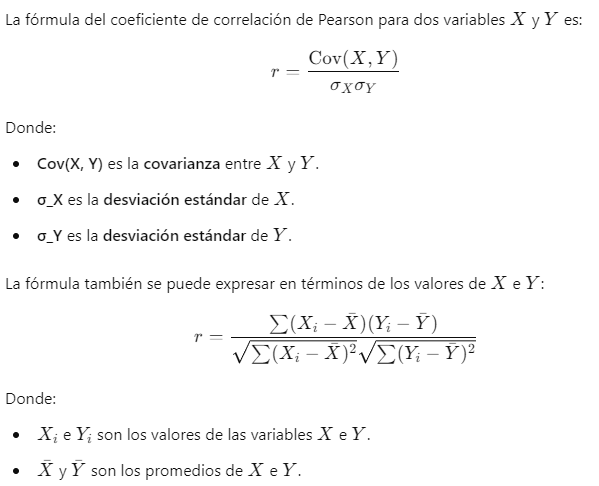

**Interpretación de los valores del coeficiente de Pearson:**
El valor del coeficiente de Pearson varía entre -1 y 1.
- r ≈ 1: Correlación positiva fuerte. A medida que una variable aumenta, la otra también aumenta.
- r ≈ -1: Correlación negativa fuerte. A medida que una variable aumenta, la otra disminuye.
- r ≈ 0: No hay correlación lineal entre las variables. Pueden estar relacionadas de forma no lineal.

**Limitaciones del coeficiente de Pearson:**
- Solo mide relaciones lineales: Si las variables están relacionadas de manera no lineal, el coeficiente de Pearson puede ser bajo, incluso si existe una relación fuerte entre las variables.
- Sensibilidad a los valores atípicos: El coeficiente de Pearson puede ser influenciado por outliers o valores extremos, lo que podría distorsionar los resultados.


In [ ]:
df_filtro.corr(numeric_only=True)

''' numeric_only=True asegura que solo se consideren las columnas que contienen
datos numéricos para calcular la correlación'''

#Si queremos directamente ver las correlaciones con el precio:
#.sort_values():ordena los valores de la Serie en orden ascendente.
df_filtro.corr(numeric_only=True).precio.sort_values()

,precio
dormitorios,0.257939
habitaciones,0.610971
baños,0.674883
sup_total,0.726203
sup_cubierta,0.828588
precio,1.000000


Vemos que existe una importante correlación entre el precio de venta y la superficie cubierta, como era esperable.

### Visualización

<Axes: xlabel='superficie cubierta [m^2]', ylabel='Precio [USD]'>

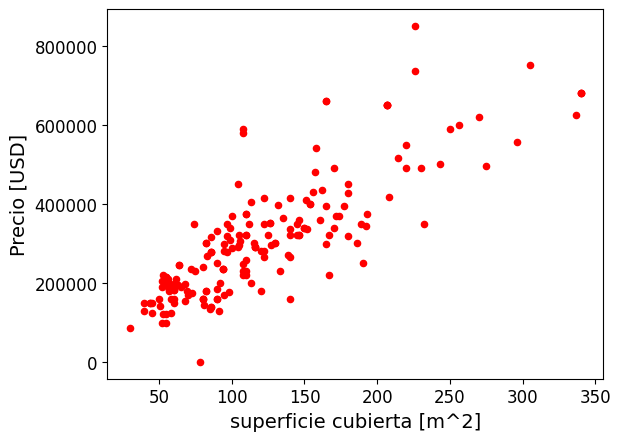

In [ ]:
df_filtro.plot(kind='scatter', x='sup_cubierta', y='precio',c='red',
               xlabel='superficie cubierta [m^2]',ylabel='Precio [USD]')


## 5. Seleccionar y entrenar un modelo

### El rol de los modelos y las familias de modelos
 El modelado de datos tiene varios objetivos:
1. **Cuantificar** una relación (como la que vimos arriba). Es decir, ponerle números a eso: "el precio de las casas es de X USD por metro cuadrado")
2. **Explorar** los datos. Muchas veces, necesitamos quitar los patrones más obvios para poder detectar cosas más sutiles. En este caso, el patrón obvio es la dependencia con la superficie. ¿Habrá algún efecto secundario con, por ejemplo, el estado de la casa, o la cantidad de baños?
3. **Resumir** la información para transmitirla mejor. Dar los números de los parámetros (ver abajo), resultan una descripción compacta de los datos.
4. **Predecir** el valor de la variable target para una propiedad que no hemos observado.


## Regresión lineal simple
Acá vamos a elegir a los modelos lineales (simples: con una única variable predictora).
El modelo de regresión lineal más sencillo relaciona una variable *target* (en este caso el precio de las casas) con la covariable (en este caso, la superficie total), *x_1*, utilizando esta fórmula:

$$
\text{precio [USD]} = \omega_0 + \omega_1 \cdot \text{sup. cubierta}\;\;
$$

donde $\boldsymbol{\omega} = (\omega_0, \omega_1)$ es el **vector de parámetros del modelo**.

Esta fórmula define una **familia de modelos**. Todos los modelos de esta familia se ven como rectas en el gráfico de arriba, pero dependiendo del valor del vector de parámetros, pueden verse muy diferentes.

De forma general los modelos lineales se escriben como

$$\vec y = X \cdot \vec \omega$$
donde $$X = \begin{pmatrix}
1&\; x_1^{(1)}&\; \dots&\;x_M^{(1)} \\
1&\; x_1^{(2)}&\; \dots&\;x_M^{(2)} \\
\vdots&\;\vdots&\;\ddots&\;\vdots \\
1&\; x_1^{(N)}&\; \dots&\;x_M^{(N)}
\end{pmatrix}$$ es la _matriz de diseño_, o, simplemente, el conjunto de datos con el que estamos entrenando. Cada fila representa una muestra, y cada columna una característica.

Para un vector de datos $x$ la función lineal es:

$$y = \omega_0 + \omega_1 x_1 + \omega_2 x_2 + \dots + \omega_M x_M$$

Ejemplo: si tenemos 3 _features_/características que queremos usar para modelizar (_predecir_) la variable target y, y tenemos _N_ datos (por ejemplo, una tabla de valores con _N_ líneas) la matriz de diseño es

$$X = \begin{pmatrix}
1&\; x_1^{(1)}&\; x_2^{(1)}&\; x_3^{(1)}\\
1&\; x_1^{(2)}&\; x_2^{(2)}&\;x_3^{(2)} \\
\vdots&\;\vdots&\;\vdots&\;\vdots \\
1&\; x_1^{(N)}&\; x_2^{(N)}&\;x_3^{(N)}
\end{pmatrix}$$

Ejemplo: predecir el precio de un inmueble en función de su superfície, edad y distancia al centro

precio [USD]=𝜔0+𝜔1⋅sup. cubierta.+ 𝜔2⋅edad + 𝜔3⋅distancia

Los modelos son lineales **en los pesos** $\omega_i$


El siguiente bloque de código visualiza los puntos de datos y dibuja varias líneas aleatorias para ilustrar el concepto de regresión lineal:

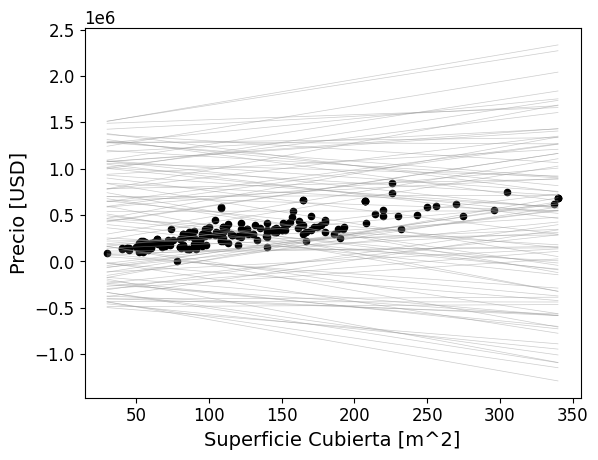

In [ ]:
#Nuevamente para dibujar los puntos del dataframe:
df_filtro.plot(kind='scatter', x='sup_cubierta', y='precio', c='black',
               ylabel='Precio [USD]',
               xlabel='Superficie Cubierta [m^2]')

# Defino una serie de valores de los parámetros al azar
np.random.seed(42) #semilla aleatoria para q los números aleatorios generados sean los mismos cada vez q se ejecute el código.

#Estas líneas generan 100 valores aleatorios para w0 y w1. Se extraen de una distribución uniforme
#dentro de un rango especificado, lo que significa que cualquier valor dentro de ese rango tiene la misma probabilidad de ser elegido.
w0 = st.uniform(loc=-5e5, scale=2e6).rvs(100)
w1 = st.uniform(loc=-3000, scale=6000).rvs(100)

# Creo un arreglo con dos valores (suficiente para una recta, entre el máximo y el mínimo de los valores de sup_cubierta)
x = np.linspace(df_filtro.sup_cubierta.min(), df_filtro.sup_cubierta.max(), 2)
#np.linspace: función de NumPy q genera una cantidad específica de valores equiespaciados dentro de un rango dado.

# Para cada par de parámetros w0 y w1, grafico una recta:

'''zip: C/iteración del bucle toma un par (ww0, ww1) y los usa para graficar
una recta. Se utiliza p combinar 2 o + iterables (como listas, tuplas o arreglos)
en pares(o tuplas) de elementos, tomándolos uno a uno de cada iterable en paralelo.
alpha: Controla la transparencia de la línea.'''

for ww0, ww1 in zip(w0, w1):
    plt.plot(x, ww0 + ww1 * x, '-', color='0.6', lw=0.5, alpha=0.5)

De todas estas rectas, muy pocas tienen una similitud con los datos, para encontrar una recta que describa correctamente los datos, entonces tenemos que encontrar el valor adecuado de los parámetros. La buena noticia es que existe una manera analítica (es decir, exacta) de encontrar el valor de los parámetros que hacen que la curva se ajuste lo mejor posible a los datos. Pero antes de llegar a eso....

**Pensemos**

 - ¿Qué características nos gustaría que tuviera la curva que describa a los datos?

### Los residuos
Para una recta cualquiera, podemos **graficar la distancia entre los puntos y la recta como segmentos**.

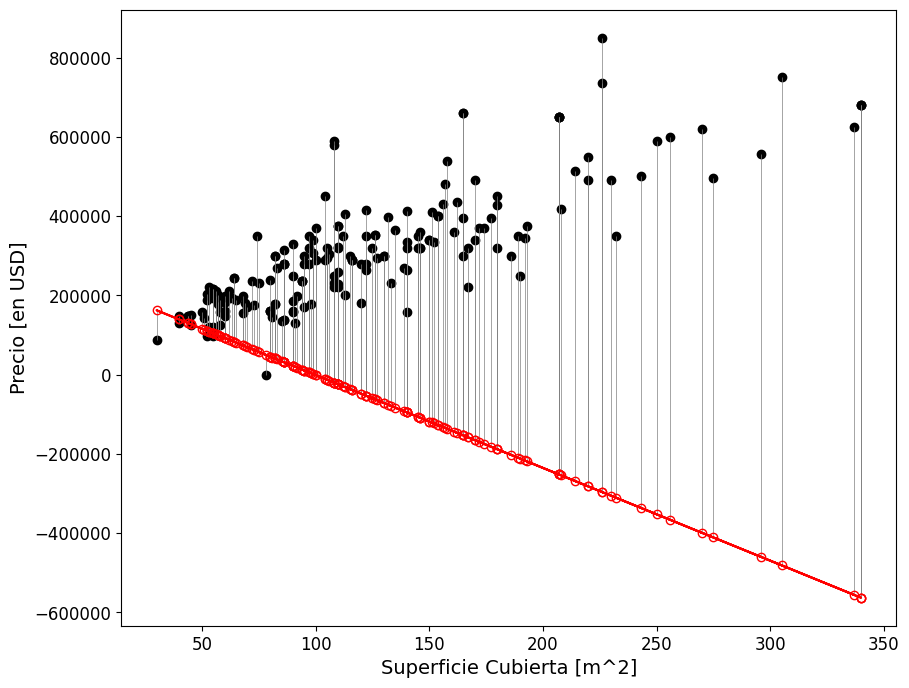

In [ ]:
#Definimos la función plot_data para gráficar los datos:
#kwargs: permite q la función acepte cualquier num de argumentos adicionales no definidos en clave/valor
def plot_data(data, xvar='sup_cubierta', yvar='precio', **kwargs):
    color = kwargs.pop('c', 'black')
    mietiqueta_y = kwargs.pop('ylabel', 'Precio [en USD]')
    mietiqueta_x = kwargs.pop('xlabel', 'Superficie Cubierta [m^2]')

    # Define el tamaño de la figura
    fig, ax = plt.subplots(figsize=(10, 8))  # Ajusta el tamaño aquí

    # Genera el scatter plot en el mismo axis
    ax.scatter(data[xvar], data[yvar], c=color)
    ax.set_xlabel(mietiqueta_x)
    ax.set_ylabel(mietiqueta_y)

plot_data(df_filtro)

#kwargs: keyword arguments

# Genero un número al azar entre 0 y 100
irandom = np.random.randint(100)

# Grafico la curva correspondiente a ese número al azar
plt.plot(x, w0[irandom] + w1[irandom] * x, '-', color='0.6', lw=0.5)

# Predicciones del modelo para ese numero random
pred = w0[irandom] + w1[irandom] * df_filtro.sup_cubierta

# Grafico líneas verticales que representan los residuos
plt.vlines(x=df_filtro.sup_cubierta.values,
            ymin=df_filtro.precio.values,
            ymax=pred.values, color='0.5', lw=0.5)

# Agrego los puntos sobre la recta
plt.plot(df_filtro.sup_cubierta, pred, marker='o', color='red', mfc='None', ms=6)
plt.show()


A estas distancias, se las llama **residuos** de la recta. Pueden ser positivos, si los puntos negros están por encima de la recta, o negativos, si están por debajo.

Matemáticamente, para el punto $i$, podemos escribir que el residuo $r_i$ es:

$r_i = \text{precio}_i - (\omega_0 + \omega_1 \cdot \text{sup. cubierta}_i)\;\; .$

Con esta definición, podemos aventurar:

> El mejor conjunto de parámetros será el que haga que **los valores absolutos** de los residuos sean lo más chicos posibles.

¿Los residuos de qué puntos? La idea es que sea lo más chico posible "para todos" los puntos... Lo más parecido que podemos hacer a esto es:

> El mejor conjunto de parámetros será el que haga que **el promedio de los valores absolutos** de los residuos sean lo más chicos posibles.

Con esto llegamos a la definición del **error absoluto promedio (o medio)**, MAE, por sus siglas en inglés, que matemáticamente se escribe:

$$
\text{MAE} = \frac{1}{N} \left(|r_1| + |r_2| + \cdots + |r_N|\right) = \frac{1}{N} \sum_{i=1}^N \left| r_i \right |\;\;.
$$

Muchas veces se buscan los parámetros que minimizan el promedio de los residuos al cuadrado. Como el cuadrado es una función creciente, cuando se minimice uno, se minimiza el otro. Esto define el **error cuadrático promedio**, MSE:

$$
\text{MSE} = \frac{1}{N} \left(r_1^2 + r_2^2 + \cdots + r_N^2\right) = \frac{1}{N} \sum_{i=1}^N \left( r_i \right )^2\;\;.
$$

Existe una manera matemática exacta de encontrar los valores de los parámetros que minimizan estas funciones


### Uso de las funciones de `scikit-learn`
Tomemos ahora un **modelo de regresión lineal de sklearn** y lo utilizamos para ajustar los datos. Para simplificar, cambiaremos primero los nombres de las variables relevantes.

la variable predictora (o variable independiente) es la variable de entrada que usamos para hacer predicciones.

Además, las variables predictoras tienen que ir en formato matricial: los datos en cada fila y las covariables en cada columna. Esa matriz es la **matriz de diseño**.

In [ ]:
#Variables predictoras (en una matriz, por eso la linea al final del nombre)
#Se pasa de un arreglo 1D a 2D- Con -1 calcula autom. la cant de filas. el 1 es la cant de columnas
X_ = df_filtro.sup_cubierta.values.reshape(-1, 1)
t = df_filtro.precio.values

#Cambia X_ de un arreglo 1D con 188 elementos a un arreglo 2D con 188 filas y 1 columna. -1: permite que numpy
#calcule automáticamente cuántas filas son necesarias, manteniendo el total de elementos =.
#se hace porque sklearn espera que la variable predictora este en formato de matriz de diseño (2d)

print(X_.shape, t.shape)

'''En este caso, X_ es la variable predictora porque contiene los datos que
queremos utilizar para predecir otra variable (por ejemplo, el precio de una propiedad).'''

(188, 1) (188,)


'En este caso, X_ es la variable predictora porque contiene los datos que\nqueremos utilizar para predecir otra variable (por ejemplo, el precio de una propiedad).'

In [ ]:
#Instanciemos el regresor lineal y ajustemos los datos.
from sklearn.linear_model import LinearRegression

#instanciamos el modelo
# La opción fit_intercept=True le indica que ajuste un término independiente
lr= LinearRegression(fit_intercept=True) #el bias se guarda en intercept_ y coef_ solo guarda los términos de las variables

In [ ]:
#Ajustamos (con el metodo fit)
lr.fit(X_, t)

LinearRegression()

¿Qué hace el `.fit`?
* El método `.fit` fitea (ajusta) el modelo a los datos.
   * Para eso, *minimiza* el error en función de los parámetros, este calculo "ya viene incluido" dentro de .fit.
   * Ajusta automáticamente el modelo utilizando el Criterio de Mínimos Cuadrados Ordinarios (Ordinary Least Squares - OLS). Para los modelos lineales, minimizar el Error Cuadrático Medio (MSE) es equivalente a minimizar la suma de los cuadrados de los residuos, que es lo que hace el método OLS.
   * En otras palabras, el resultado del `fit` es determinar los parámetros del modelo que mejor ajustan esos datos.
   * Podemos decir que con eso **entrenamos** el modelo, o que el modelo ha "aprendido" de los datos.
   * En el caso particular de la regresión linear, esa solución para los parámetros del modelo es muy simple, tiene una expresión matemática que se puede calcular en un par de líneas de código
   * En general, _fitear_ requiere métodos sofisticados de minimización, especialmente si hay muchos parámetros y/o si *cambiamos la figura de mérito/métrica* del error

### Los parámetros

Podemos ver el valor de los parámetros encontrados gracias a sklearn: El parámetro que no acompaña a ninguna variable ($\omega_0$) está en el atributo `intercept_`. El resto (en este caso solo $\omega_1$) están en el atributo `coef_`. Esto se debe a que se utiliza fit_intercept(True)

In [ ]:
print('omega_0 = {:.3f}\n omega_1 = {:.3f}'.format(lr.intercept_, lr.coef_[0]))

omega_0 = 68246.235
 omega_1 = 1979.985


**Interpretemos estos números...**

### 6. Evaluación del modelo.
Ahora que el modelo está ajustado, se va analizar si las cosas han funcionado como se esperaba...y si no, veremos algunas ideas de cómo mejorarlo.

Antes de empezar, vamos a representar el modelo obtenido junto con los datos.
Para ello, necesitamos obtener las predicciones que hace el modelo en una serie de puntos. Para calcular las predicciones, todos los estimadores en `sklearn` usan el método `predict`.

¿Qué hace el `.predict`?

* Una vez entrenado un dado modelo con un conjunto de datos (con `.fit`) se puede usar ese método para obtener las _predicciones_ del modelo.
* O sea, para cualquier conjunto de x, nos va a dar el _resultado del modelo_ (la función), usando los parámetros obtenidos a partir del entrenamiento.
* Las predicciones se hacen para cada dato en particular (cada x)
* En el `.fit` se varian los parámetros del modelo. El conjunto de datos es fijo.
* En el `.predict`, los parámetros están fijos y se puede calcular para cualquier dato.

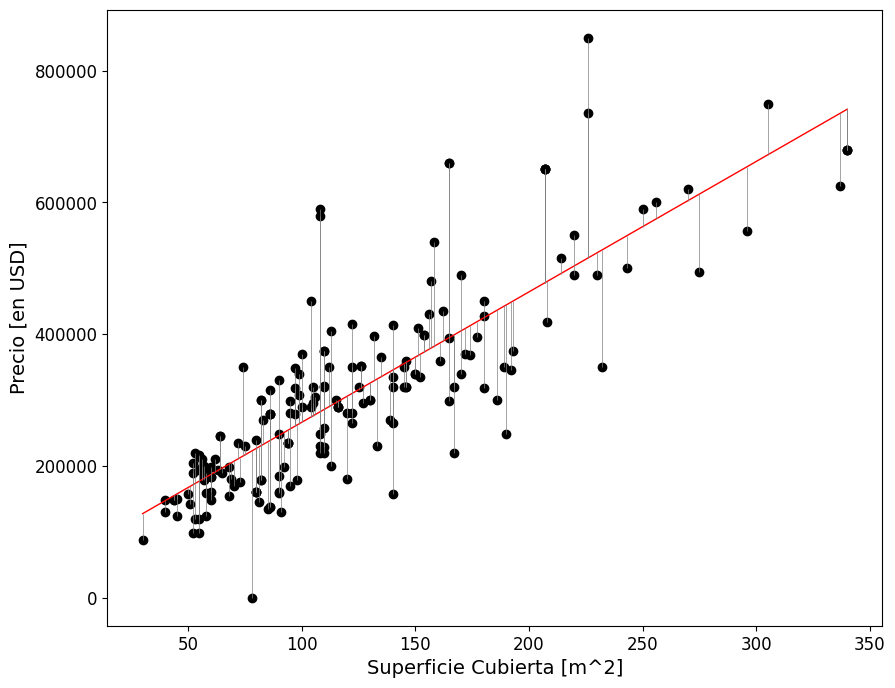

In [ ]:
#Plot de los datos (llamo a la funcion)
plot_data(df_filtro)

# Calculamos la recta como antes, pero usando los parámetros del ajuste
y = lr.intercept_ + lr.coef_[0] * x
# Otra forma es con el método predict:
y = lr.predict(x.reshape(-1, 1))

# Graficamos:
plt.gcf().axes[0].plot(x,y,'r-', lw=1) #gcf significa "Get Current Figure"

#(obtener la figura actual). 'r-': línea roja ('r', rojo) y continua ('-', sólida).
#lw=1: grosor de la línea (en este caso, 1 punto de grosor).

## Agregamos residuos

# predicciones del modelo en los puntos conocidos
pred=lr.predict(X_)

#Grafico lineas verticales
plt.vlines(x=df_filtro.sup_cubierta.values,
           ymin=df_filtro.precio.values,
           ymax=pred, color='0.5', lw=0.5)
plt.show()

### Métricas
1era forma de evaluar un modelo: calcular la métrica que se utilizaron para ajustar los parámetros del modelo, la MAE y MSE.

Ambas están implementadas en `sklearn`, en el paquete `metrics`, y se usan de manera idéntica: se les pasa el valor de la variable target y lo que el modelo predice para esos datos.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#uso el t y las pred del modelo
print('MAE [K$] = {:.2f}'.format(mean_absolute_error(t, pred)/1e3)) #error absoluto promedio (o medio)
print('MSE [$^2]= {:.2f}'.format(mean_squared_error(t,pred)/1e3)) #error cuadrático promedio

'''Como las unidades del MSE son dólares al cuadrado, muchas veces se reporta la
#raíz del error cuadrático medio, RMSE:'''
print('RMSE [K$]= {:.2f}'.format(np.sqrt(mean_squared_error(t,pred))/1e3))

MAE [K$] = 61.48
MSE [$^2]= 7391688.93
RMSE [K$]= 85.97


Vemos que las métricas no dan el mismo número, pero sí estamos seguros de que son mínimas.

##### Coeficiente de determinación

Otra métrica muy usada para evaluar un modelo es el coeficiente de determinación:

$$
R^2 = \frac{SC_\mathrm{tot} - SC_\mathrm{res}}{SC_\mathrm{tot}}\;\;,
$$

Que refleja la parte de la varianza de los datos que el modelo alcanza a explicar. $SC_\mathrm{tot}$ es la suma de los cuadrados de los residuos.
$SC_\mathrm{res}$ es la variación de los valores reales respecto al valor medio. Esto se puede ver de la expresión (no obvia):
$$
\underbrace{\sum_{i=1}^N\left(t - \bar{t}\right)^2}_{SC_\mathrm{tot}} = \underbrace{\sum_{i=1}^N\left(t - y\right)^2}_{SC_\mathrm{res}} + \underbrace{\sum_{i=1}^N\left(y - \bar{t}\right)^2}_{SC_\mathrm{reg}}\;\;.
$$


Se puede ver que $R^2$ toma valores entre 0 y 1. Cuanto mas cercano el resultado a 1 mejor. El paquete `sklearn.metrics` tiene una implementación de esta métrica: `r2_score`. Además, es la métrica por defecto de muchos algoritmos de regresión, bajo el método `score`.

In [ ]:
from sklearn.metrics import r2_score
print('R^2 (conjunto de entrenamiento) = {:.3f}'.format(r2_score(t, pred)))

R^2 (conjunto de entrenamiento) = 0.687


Esto significa que el modelo explica el 68\% de la varianza de los datos.

***

## **Ejercicio**


* Hagan un análisis similar eligiendo una variable predictora diferente.

* Compare el rendimiento del modelo lineal simple que utiliza "sup_cubierta" con el que han elegido.

* Ahora viene la parte bonita. Incluya en la matriz X una nueva columna, de modo que combine la "sup_cubierta" con su nueva variable, y realice un análisis similar para este "modelo lineal múltiple". ¿Qué gráficos puedes hacer todavía? **Tip**: tal vez se pueda crear una variable `sup_fondo`...

**Tip**: Para incluir una nueva variable predictora en X (la matriz de diseño); cambien YOUR_FEATURE por el nombre de la columna que desean incluir.

In [ ]:
X = df_filtro.loc[:, ['sup_cubierta', 'YOUR_FEATURE1', 'YOUR_FEATURE2', 'YOUR_FEATURE3', ...]].values
...

# Regresion Polinomial
Para esta sección vamos a generar nuestros propios datos, así:
* Tenemos una forma de comparar/evaluar los resultados: sabemos cual es la función real subyaciente que queremos aprender (en otras palabras sabemos la "verdad" y queremos ver que tan bien la recuperamos).
* Podemos generar tantos datos cuanto querramos, cuantas veces querramos
* Podemos _controlar_ los datos, probando diferentes formas funcionales de la función que queremos predecir/reproducir
* Podemos agregar ruído (dispersión) y también controlar como lo hacemos
* Podemos elegir modelos muy simples o tan complejos como querramos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


N_SAMPLES = 15 #Cantidad de datos que se van a generar (cuantos pares {t,x},
#líneas de una base de datos, etc.)

x=np.linspace(0,1,num=N_SAMPLES).reshape(-1,1)
#np.linspace: función de NumPy que genera una cantidad específica de valores equiespaciados dentro de un rango dado.
#reshape(-1, 1) transforma X_ en una matriz de 2D con una 1 columna y 15 filas.

# Fijamos la semilla aleatoria por si queremos reproducir exactamente los mismos
# resultados en otro momento:
np.random.seed(42)

#Ahora la que queremos modelizar no es más lineal en la variable. Generamos puntos a partir de ella
def ground_truth(x):  #Funcion real
  return 4*x + 2*np.sin(x*6)

#Agregamos ruido a los datos simulados para hacerlos más realistas.
t = ground_truth(x) + 0.5*np.random.randn(N_SAMPLES, 1)

# ground_truth(x): Evalúa en un conjunto de valores x, lo que da los valores
#"verdaderos" (sin ruido) que sigan el patrón de la función que se definió.
# np.random.randn(N_SAMPLES, 1): Genera un array de números aleatorios que siguen
# una distribución normal estándar (media 0 y desviación estándar 1). Aquí se generan
#  N_SAMPLES valores con una sola columna (1). 0.5*np.random.randn(N_SAMPLES, 1):
# Multiplica los números aleatorios por 0.5, esto genera un ruido q tiene una desviación estándar de 0.5 en lugar de 1.


Observación: cuando queremos aprender a predecir valores a partir de un modelo, se suele llamar: **a** y la variable target **t**.

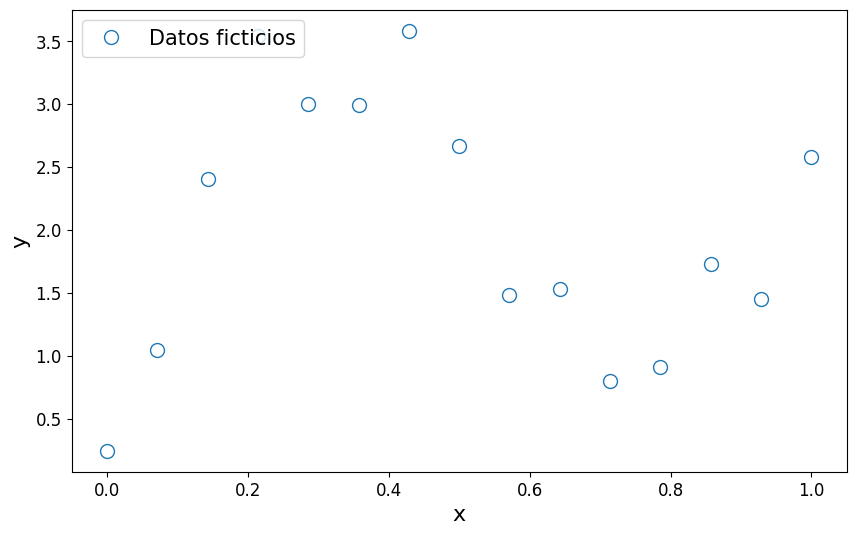

In [ ]:
#Graficamos los datos ficticios:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

ax.plot(x,t,'o',ms=10, mfc='None', label='Datos ficticios')
ax.legend(loc=2, fontsize=15)

plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.show()


In [ ]:
print(x.shape)

(15, 1)


Un polinómio de una única variable se puede escribir como:

$$y = \omega_0 + \omega_1 x + \omega_2 x^2 + \dots + \omega_M x^M$$

Por ejemplo, una función cúbica:

$$y = \omega_0 + \omega_1 x + \omega_2 x^2 + \omega_3 x^3$$

En nuestro ejemplo sería algo así:
$$
\text{precio [USD]} = \omega_0+ \omega_1 \cdot \text{sup. cubierta}\  + \omega_2\cdot \text{sup. cubierta}^2\ + \omega_3 \cdot \text{sup. cubierta}^3\;\;
$$

Vean la semejanza con una función _lineal_ de varias variables.

En la regresión polinomial, generamos nuevas columnas usando potencias de la variable original. De forma que la función sigue siendo lineal en los *parámetros* $\omega_i$.

La matriz de diseño es
$$\vec y = X \cdot \vec \omega$$
donde $$X = \begin{pmatrix}
1&\; x^{(1)}&\; \dots&\;\left(x^{(1)}\right)^M \\
1&\; x^{(2)}&\; \dots&\;\left(x^{(2)}\right)^M \\
\vdots&\;\vdots&\;\ddots&\;\vdots \\
1&\; x^{(N)}&\; \dots&\;\left(x^{(N)}\right)^M
\end{pmatrix}$$

Para generar esa matriz podemos usar `PolynomialFeatures` de `sklearn`:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
M = 3 #grado del polinomio

#generamos la matriz de diseño para regresión polinomial de tercer orden (función cúbica)
poly = PolynomialFeatures(M)
x_poly = poly.fit_transform(x)

# poly.fit_transform(x): toma el vector x de entrada
# y crea una "matriz de diseño" que contiene todos los términos polinómicos hasta
# el grado M. Si x es un vector de características, x_poly contendrá las columnas
# [1,𝑥,𝑥^2,𝑥^3]. Esto permite que el modelo considere términos cuadráticos y
#cúbicos de x para ajustar una función cúbica.

### ¿Qué hace fit_transform()?
Ejecuta dos pasos al mismo tiempo:
- fit() → ajusta/entrena el objeto transformador a los datos.
En el caso de PolynomialFeatures, analiza los datos X y determina cómo generar las nuevas características polinómicas (ej: 𝑥,𝑥^2,𝑥^3, combinaciones, etc.).
No aprende parámetros como un modelo, pero sí "define" la estructura de las transformaciones.

- transform() → aplica esa transformación a tus datos originales y devuelve un nuevo array con las características expandidas.

In [ ]:
# si todavia tienen dudas que hace PolynomialFeatures vean el primer elemento de X y su correspondiente versión polinómica de grado 3
#por ej
print(x[3]) #da la fila original
print(x_poly[3]) #1 es el termino independiente, luego x, x^2 y x^3. Da la misma fila expandida con los términos polinómicos

[0.21428571]
[1.         0.21428571 0.04591837 0.00983965]


Ahora hacemos el **ajuste** usando la **regresión lineal**:

In [ ]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression(fit_intercept=False)
# fit_intercept=False guarda todos los coeficientes en coef_ incluido el término independiente

lr.fit(x_poly,t)
# ajusta el modelo de regresión lineal como antes pero ahora usando la matriz x_poly
# (con los términos polinómicos de x) para predecir t, que es el vector de valores objetivo.

LinearRegression(fit_intercept=False)

Lo que hacemos es transformar las variables de entrada (features) para incluir términos polinómicos, y después aplicamos una regresión lineal sobre esas nuevas variables. El polinomio lo genera la transformación, y lo que queda es simplemente una regresión lineal sobre esas variables nuevas. Se llama “lineal” porque es lineal en los parámetros (𝑤), no necesariamente en 𝑥.
Al agregar 𝑥2,𝑥3, el modelo es capaz de capturar relaciones no lineales entre
𝑥 y y. LinearRegression es el motor y PolynomialFeatures es el truco para generar las variables polinómicas.

In [ ]:
# Miramos los coeficientes (ahora recordemos que tenemos más de dos)
print(*lr.coef_)

#contiene los coeficientes de los términos de la regresión polinómica
# ajustada. Cada valor en lr.coef_ corresponde a un término en el polinomio ajustado.
#Si M = 3, entonces lr.coef_ tendrá cuatro valores que corresponden a los coeficientes de
#[1,𝑥,𝑥^2,𝑥^3]. el * es para que salga sin los []

[-6.05967099e-02  2.62201291e+01 -6.12618289e+01  3.77036690e+01]


In [ ]:
x_= np.linspace(0,1,100).reshape(-1,1) #genero los datos para graficar en una matriz 2D de 15 filas y una columna


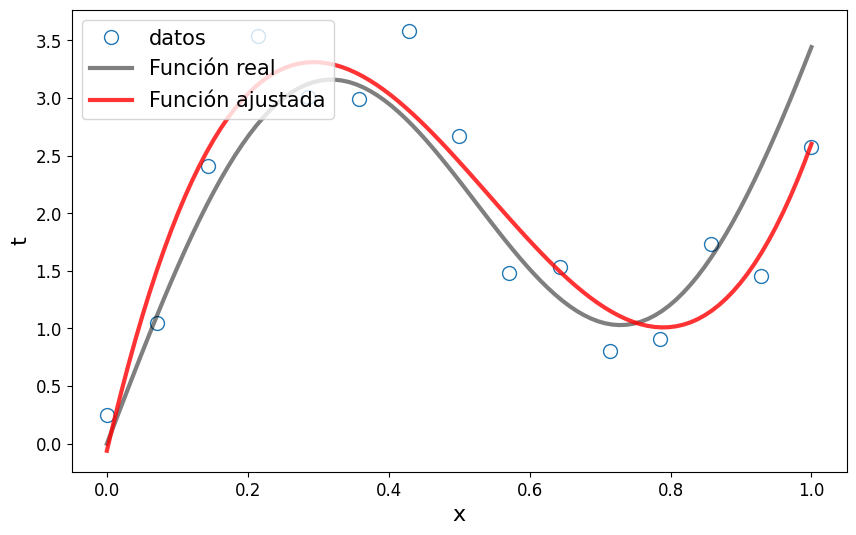

El MSE es: 0.13


In [ ]:
from sklearn.metrics import mean_squared_error

predictions=lr.predict(poly.transform(x_))

# poly.transform(x_): Aplica transformación polinómica pero a x_ pasa a una "matriz de diseño" de
# características polinómicas, incluyendo los términos [1,𝑥,𝑥2,𝑥3]
# x_ queda en el mismo formato que x_poly, que el modelo espera.
# lr.predict(...): Llama al método predict del modelo regresión lineal (lr), el
# argumento son  las características transformadas poly.transform(x_).
# Esto produce las predicciones para los valores de x_.

fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

x_=np.linspace(0,1,100).reshape(-1,1) #valores para graficar la curva
ax.plot(x,t,'o',ms=10,mfc='None',label='datos') #datos con ruido
ax.plot(x_, ground_truth(x_), 'k-', lw=3, alpha=0.5, label='Función real')
ax.plot(x_, predictions, 'r-', lw=3, alpha=0.8, label='Función ajustada')
ax.legend(loc=2,fontsize=15)

plt.xlabel('x', fontsize=16)
plt.ylabel('t', fontsize=16)
plt.show()

error = mean_squared_error(t, lr.predict(x_poly))

print(f"""El MSE es: {round(error,2)}""")


## Hyper-parámetros y Pipelines
Ahora podemos ver que nuestro modelo tiene un **hiperparámetro**: el grado del polinomio $M$. Podemos variar este hiperparámetro, y por lo tanto variar nuestro modelo, para ver cómo se comporta.

Para ello, vamos a poner todo junto en un Pipeline. Un pipeline es una lista de tuplas `(nombre, modelo)`, en la que cada modelo tiene un método `fit` que se alimenta de la salida del modelo anterior. La entrada del primer modelo son las variables de entrada, y la salida de todos los modelos menos el último se obtiene a través del método `transform`. Esto nos permite armar una cadena de modelos que _transforman_ los datos de entrada, los cuales son alimentados en el último modelo que se llama _estimador_ y tiene un método `predict` que arroja la predicción de toda la tubería (pipe).

Forma en la que se construye esto:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Definimos el pipeline
def polynomial_regressor(M): #M: grado del polinomio
  return Pipeline([('scaler', StandardScaler()), #siempre se recomienda escalar para que todos tengan valores acordes
                    ('poly_features', PolynomialFeatures(M)),
                    ('regressor', LinearRegression(fit_intercept=False))])

In [ ]:
#AHORA SE PUEDE HACER EL AJUSTE CUADRATICO EN UN SOLO PASO
pr=polynomial_regressor(3) #grado del polinomio
pr.fit(x,t) #Muestra el grafico de las etapas del pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_features', PolynomialFeatures(degree=3)),
                ('regressor', LinearRegression(fit_intercept=False))])

Se puede usar las funciones que definimos al principio para el cálculo del error.

In [ ]:
error=mean_squared_error(t, pr.predict(x))
print(f'El MSE: {round(error,2)}')

El MSE: 0.13


Los nombres de cada tupla se utilizan como clave para acceder a cada uno de los _pasos_ del pipeline en el diccionario `named_steps`:

In [ ]:
pr.named_steps
#muestro los nombres da cada pipeline:

{'scaler': StandardScaler(),
 'poly_features': PolynomialFeatures(degree=3),
 'regressor': LinearRegression(fit_intercept=False)}

Esto puede usarse, por ejemplo, para obtener los valores de los parámetros ajustados.

In [ ]:
pr.named_steps['regressor'].coef_
#named_steps: diccionario de los pasos en el pipeline, donde c/paso está asociado
# a un nombre de clave. ['regressor']: LinearRegression, .coef_:
# los coefic. del modelo de regresión lineal ajustado en el pipeline.

array([[ 2.44696925, -2.08739969, -0.44822147,  1.10815284]])

## Aumentando el grado del polinomio y sobreajuste
Ahora, podemos iterar sobre ciertos grados del polinomio y ver cómo se comporta

In [ ]:
#Creo una lista de grado
degrees=range(1,15) #lista de 1 a 14

#Inicializamos las listas
errors=[]
models=[]

#Itera en todos los grados
for M in degrees:
  print(f'Grado del polinomio: {M}')

  #Creo el modelo del polinimio
  pr=polynomial_regressor(M)
  #entrenar
  pr.fit(x,t)

  #Evaluar los errores
  error=mean_squared_error(t, pr.predict(x))
  print(f'El MSE: {round(error,2)}')
  #guarda el resultado en listas
  errors.append(error)
  models.append(pr)
#

Grado del polinomio: 1
El MSE: 1.01
Grado del polinomio: 2
El MSE: 0.85
Grado del polinomio: 3
El MSE: 0.13
Grado del polinomio: 4
El MSE: 0.13
Grado del polinomio: 5
El MSE: 0.1
Grado del polinomio: 6
El MSE: 0.1
Grado del polinomio: 7
El MSE: 0.1
Grado del polinomio: 8
El MSE: 0.06
Grado del polinomio: 9
El MSE: 0.06
Grado del polinomio: 10
El MSE: 0.06
Grado del polinomio: 11
El MSE: 0.02
Grado del polinomio: 12
El MSE: 0.01
Grado del polinomio: 13
El MSE: 0.0
Grado del polinomio: 14
El MSE: 0.0


Vemos que aumentar el grado del polinomio: **¡mejora el ajuste!**.

Veamos graficamente todos estos modelos

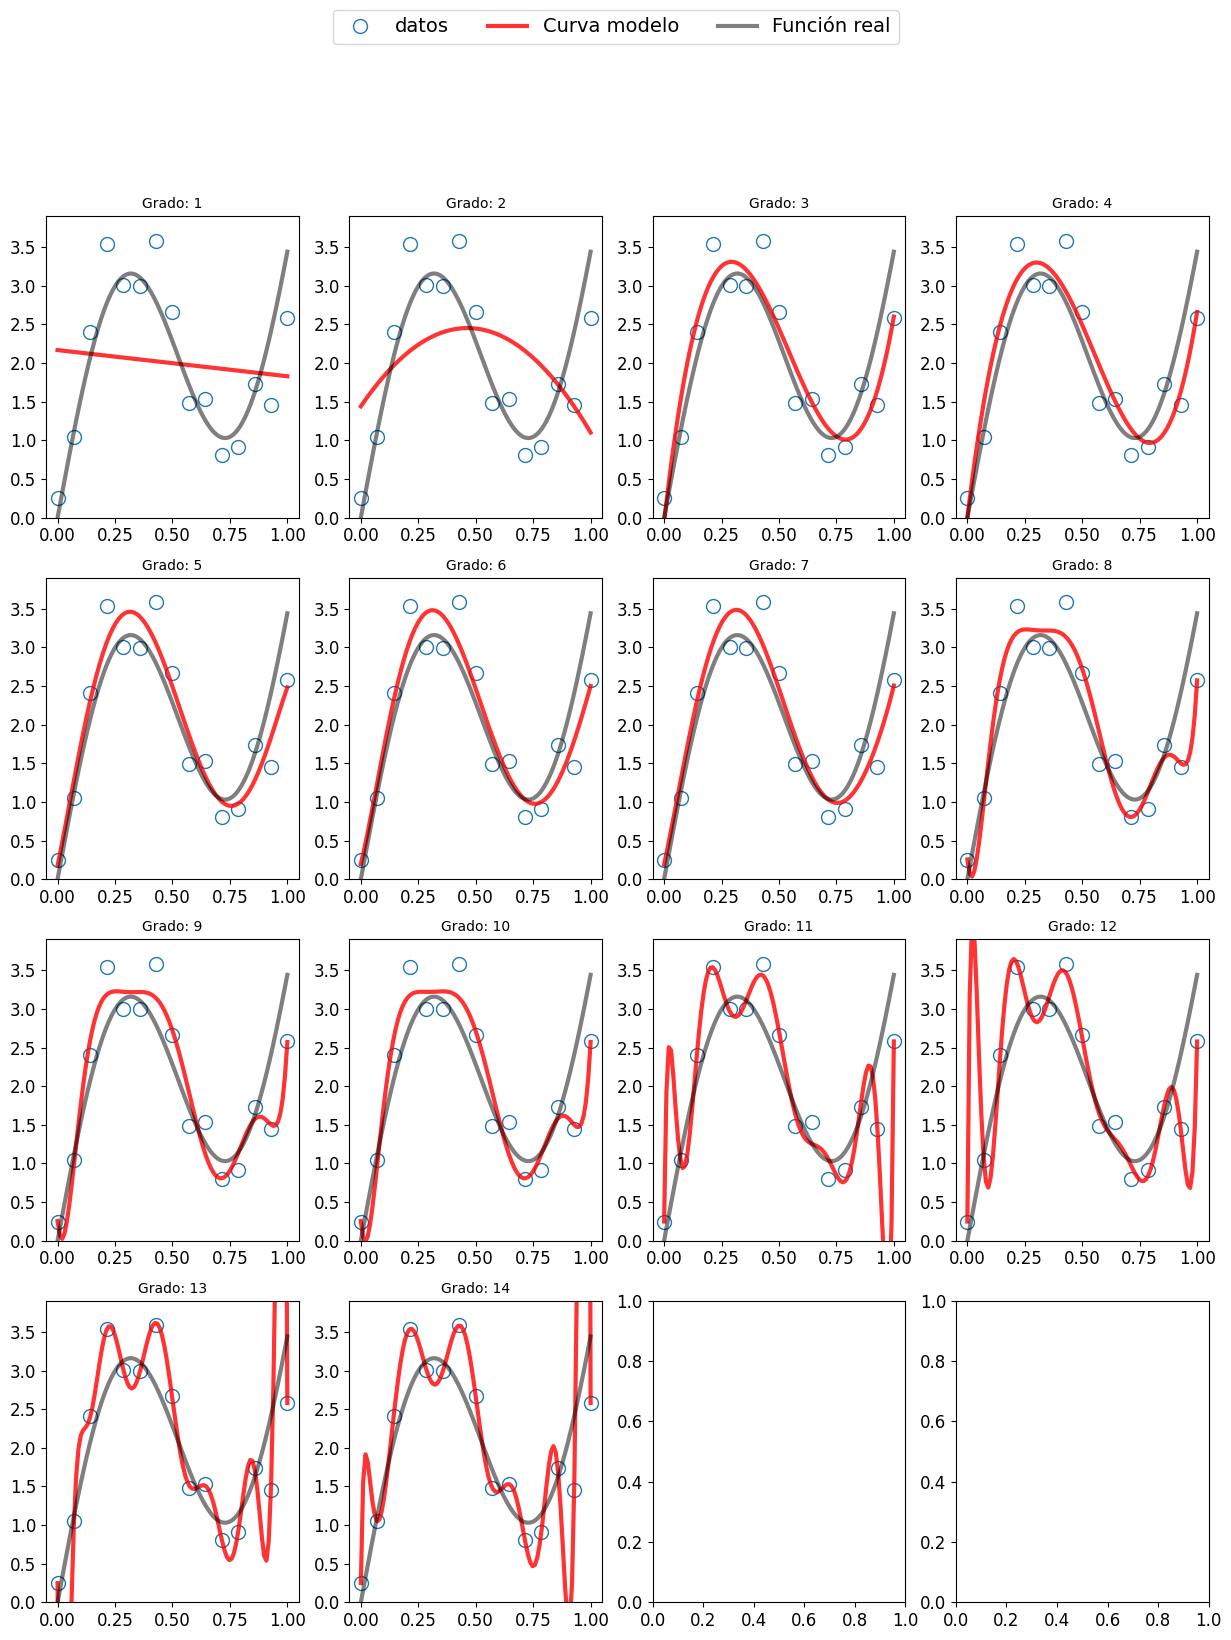

In [ ]:
#Para hacer múltiples gráficas:
ncolumns=4 #establece que la cuadrícula de gráficos tendrá 4 columnas

fig=plt.figure(figsize=(15,18)) #Se crea 1 figura, donde se ponen los subgráficos

# El código de abajo comprueba si el núm de modelos (M) es divisible por el número
# de columnas (ncolumns). Si no lo es, necesita una fila adicional (extrarow=1)
# para acomodar los gráficos restantes.

if M % ncolumns==0: #len(models)
  extrarow=0
else:
  extrarow=1

axs=fig.subplots(ncols=ncolumns,nrows=int(np.floor(len(models)/ncolumns)+extrarow))
# genera una cuadrícula de subgráficos (axs) con el núm de columnas (ncolumns)
# y el número de filas calculadas en base al núm total de modelos (len(models)).

x_=np.linspace(0,1,100).reshape(-1,1)

# genera un conjunto de valores x_ entre 0 y 1 con 100 puntos uniformemente espaciados.
# Se usan para trazar las predicciones de cada modelo de regresión polinomial.
# reshape(-1, 1) convierte x_ en un arreglo de una sola columna.

# itera sobre cada modelo i en models y su subgráfico correspondiente ax.
# axs.flatten() convierte la cuadrícula en una lista de subgráficos:

for i,ax in zip(range(len(models)),axs.flatten()):
  ax.plot(x,t,'o',ms=10,mfc='None',label='datos')
  ax.plot(x_, models[i].predict(x_), 'r-', lw=3, alpha=0.8, label='Curva modelo')
  ax.plot(x_, ground_truth(x_), 'k-', lw=3, alpha=0.5, label='Función real')

  ax.set_title(f'Grado: {degrees[i]}', fontsize=10)
  ax.set_ylim(0,3.9)

# La función zip agrupa estos elementos en pares (i, ax) que luego se pueden usar
# para recorrer simultáneamente los modelos (i) y los subgráficos (ax).

# Hacemos la leyenda :
handles, labels=ax.get_legend_handles_labels()
fig.legend(handles,labels,loc='upper center',fontsize=14,ncol=len(handles),
           borderaxespad=0.5)
plt.show()

¿Conviene aumentar el grado del polinómio? ¿Que pasaría si tuviéramos menos puntos? o ¿Qué pasa si se agregan más puntos?

## Separando los datos en **entrenamiento** y **testeo**
Para atacar el problema del sobreajuste, separaremos los datos aleatoriamente en un _conjunto de entrenamiento_ y en un _conjunto de testeo_.

Para eso usareremos la función `train_test_split`de `sklearn`.

In [ ]:
from sklearn.model_selection import train_test_split

#Separamos los datos en entrenamiento y testeo
x_train, x_test, t_train, t_test=train_test_split(x,t,random_state=42) #42 semilla


Visualizamos el dataset con `matplotlib`. Usamos colores diferentes para los datos del conjunto de testeo y los de entrenamiento. Además, agregamos la función de la que provienen los datos.

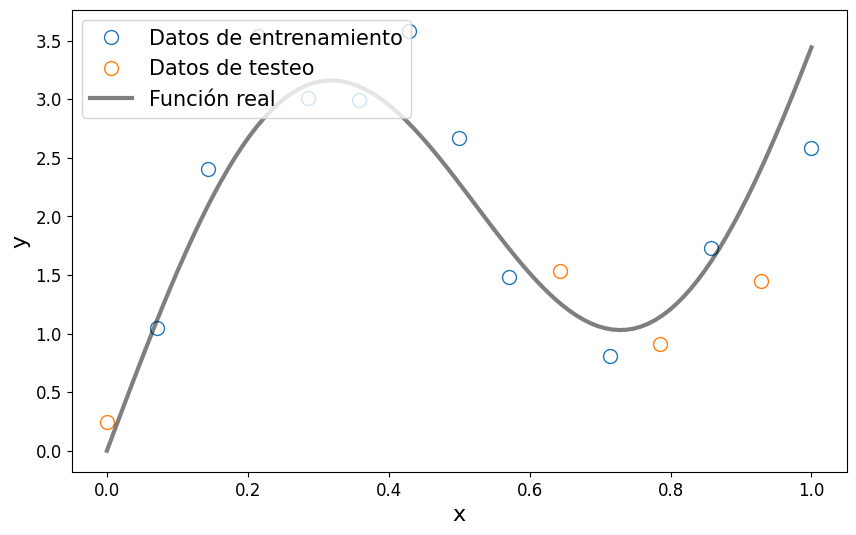

In [ ]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

x_=np.linspace(0,1,100).reshape(-1,1)
ax.plot(x_train,t_train,'o',ms=10,mfc='None',label='Datos de entrenamiento')
ax.plot(x_test,t_test,'o',ms=10,mfc='None',label='Datos de testeo')
ax.plot(x_, ground_truth(x_), 'k-', lw=3, alpha=0.5, label='Función real')
ax.legend(loc=2,fontsize=15)

plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.show()
#

Definimos un par de funciones útiles que se van a utilizar durante el resto del notebook.

- La *primera* se usa para *graficar los datos y las predicciones de modelos*.
- La *segunda calcula los errores de un modelo* sobre los datos de entrenamiento y de testeo.

In [ ]:
#Para graficar los datos y las predicciones de modelos:
def plot_data(model, x, y, x_test=[], y_test=[], gt=False):
  fig=plt.figure(figsize=(10,6))
  ax=fig.add_subplot(111)

  #Dibuja los datos de entrenamiento
  ax.plot(x_train,t_train,'o',ms=10,mfc='None',label='Datos')

  #Chequea si el conjunto de prueba esta presente
  if len(x_test)>0:
    assert len(x_test) == len(y_test), "El tamaño del dataset es incompatible"
    #Dibuja los datos de testeo
    ax.plot(x_test,y_test,'o',ms=10,mfc='None',label='Datos de testeo')

  #Define arreglo sobremuestreado (para que se vea la línea contínua)
  x_=np.linspace(0,1,100).reshape(-1,1)

  #Hace las predicciones sobre un arreglo sobre muestreado
  predictions=model.predict(x_)

  #Dibuja la predicción
  ax.plot(x_, predictions, 'r-', lw=4, alpha=0.8, label='Curva predicha')

  #Dibuja la real
  if gt:
    ax.plot(x_, ground_truth(x_), 'k-', lw=3, alpha=0.5, label='Función real')

  ax.legend(loc=2,fontsize=15)
  plt.xlabel('x', fontsize=16)
  plt.ylabel('t', fontsize=16)
  plt.show()
  #return

# Para calcular los errores de un modelo sobre los datos de entrenamiento y de testeo.
# print si es True, se imprimen los resultados de los errores

def compute_errors(model, x_train, y_train, x_test=None, y_test=None, print_result=True):
  training_error=mean_squared_error(y_train, model.predict(x_train))
  if print_result:
    print(f'El MSE en el entrenamiento es: {round(training_error,2)}')

  if x_test is not None and y_test is not None:
        test_error = mean_squared_error(y_test, model.predict(x_test))
        if print_result: print(f"El MSE en el testeo es: {round(test_error,2)}")
        return training_error, test_error
  else:
        return training_error

  #model.predict(x_train): realiza predicciones en el conjunto de entrenamiento.
  #mean_squared_error(t_train, model.predict(x_train)): calcula el MSE entre las
  # predicciones del modelo y los valores reales y_train.

  # PARA USAR LA FUNCION SEGUN MI INTERES:
  # Supongamos que llamas a compute_errors de dos maneras diferentes:
  # Con print_result=True como print_result es True, la función imprimirá el MSE
  # de entrenamiento (y de prueba si están disponibles x_test y y_test).
  # Con print_result=False: Ej: compute_errors(model, x_train, t_train, x_test,
  # y_test, print_result=False), al pasar explícitamente print_result=False, la
  # función no imprimirá los errores, pero los seguirá calculando y devolviendo,
  # lo cual puede ser útil si se quiere usar estos valores de error en otros cálculos
  # o funciones sin mostrarlos en pantalla.

## Dependencia en _M_
Vamos a usar todo lo que está arriba para explorar la dependencia de las metricas con el grado _M_ del polinomio.

In [ ]:
#Crea una lista de grados del polinomio
degrees=range(1,10)

#Inicializa las listas
train_errors = []
test_errors = []
models=[]

#itera sobre todos los grados
for M in degrees:
  print(f'Grado del polinomio: {M}')

  #Crea el modelo del polinomio
  pr=polynomial_regressor(M)

  #Entrena (hace el fit)
  pr.fit(x_train,t_train)

  #Evalua los errores, uso la función creada arriba
  train_e,test_e=compute_errors(pr, x_train, t_train, x_test, t_test)

  #plot_data(pr,x_train,y_train, x_test, y_test)

  #Guarda/agrega los resultados en las listas
  train_errors.append(train_e)
  test_errors.append(test_e)
  models.append(pr)

Grado del polinomio: 1
El MSE en el entrenamiento es: 0.79
El MSE en el testeo es: 2.05
Grado del polinomio: 2
El MSE en el entrenamiento es: 0.76
El MSE en el testeo es: 1.6
Grado del polinomio: 3
El MSE en el entrenamiento es: 0.14
El MSE en el testeo es: 0.23
Grado del polinomio: 4
El MSE en el entrenamiento es: 0.13
El MSE en el testeo es: 0.75
Grado del polinomio: 5
El MSE en el entrenamiento es: 0.11
El MSE en el testeo es: 0.2
Grado del polinomio: 6
El MSE en el entrenamiento es: 0.07
El MSE en el testeo es: 3.54
Grado del polinomio: 7
El MSE en el entrenamiento es: 0.07
El MSE en el testeo es: 7.59
Grado del polinomio: 8
El MSE en el entrenamiento es: 0.01
El MSE en el testeo es: 99.28
Grado del polinomio: 9
El MSE en el entrenamiento es: 0.0
El MSE en el testeo es: 566.14


Veamos como queda gráficamente

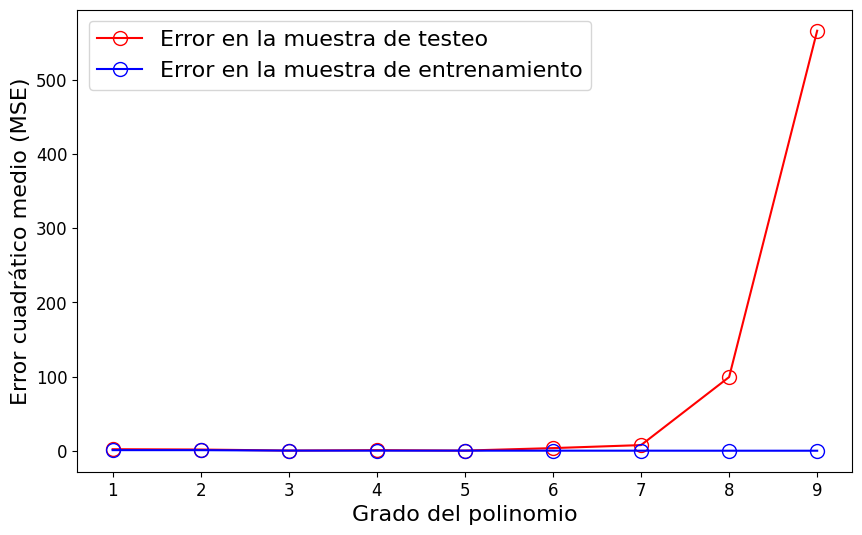

In [ ]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

#Grafico rojo: error en la muestra de prueba
ax.plot(range(1,len(test_errors)+1), test_errors, '-or', mfc='None',ms=10,label='Error en la muestra de testeo')
#Grafico azul: error en la muestra de entrenamiento
ax.plot(range(1,len(train_errors)+1), train_errors, '-ob', mfc='None',ms=10,label='Error en la muestra de entrenamiento')
_ = ax.legend(loc=0, fontsize=16)
_ = ax.set_xlabel('Grado del polinomio', size=16)
_ = ax.set_ylabel('Error cuadrático medio (MSE)', size=16)

Es útil hacer gráficas de esos valores en una escala lograrítmica, porque pueden variar mucho.

La función semilogy en matplotlib se utiliza para crear un gráfico donde el eje y es logarítmico, mientras que el eje x es lineal. Esto es útil para visualizar datos que varían en órdenes de magnitud, ya que una escala logarítmica en el eje y ayuda a mostrar patrones en valores pequeños y grandes al mism

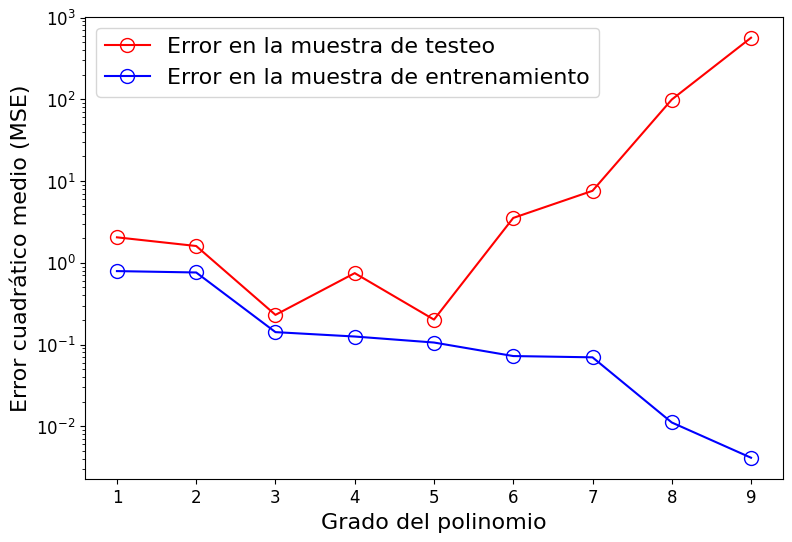

In [ ]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

ax.semilogy(range(1, len(test_errors)+1), test_errors, '-or', mfc='None', ms=10, label='Error en la muestra de testeo')
ax.semilogy(range(1, len(train_errors)+1), train_errors, '-ob', mfc='None', ms=10, label='Error en la muestra de entrenamiento')
_ = ax.legend(loc=0, fontsize=16)
_ = ax.set_xlabel('Grado del polinomio', size=16)
_ = ax.set_ylabel('Error cuadrático medio (MSE)', size=16)

## Gráficas de los modelos
También es muy ilustrativo ver esos modelos. Sin embargo, hay que tener en cuenta que esto no se puede reproducir facilmente cuando hay más de dos dimensiones.

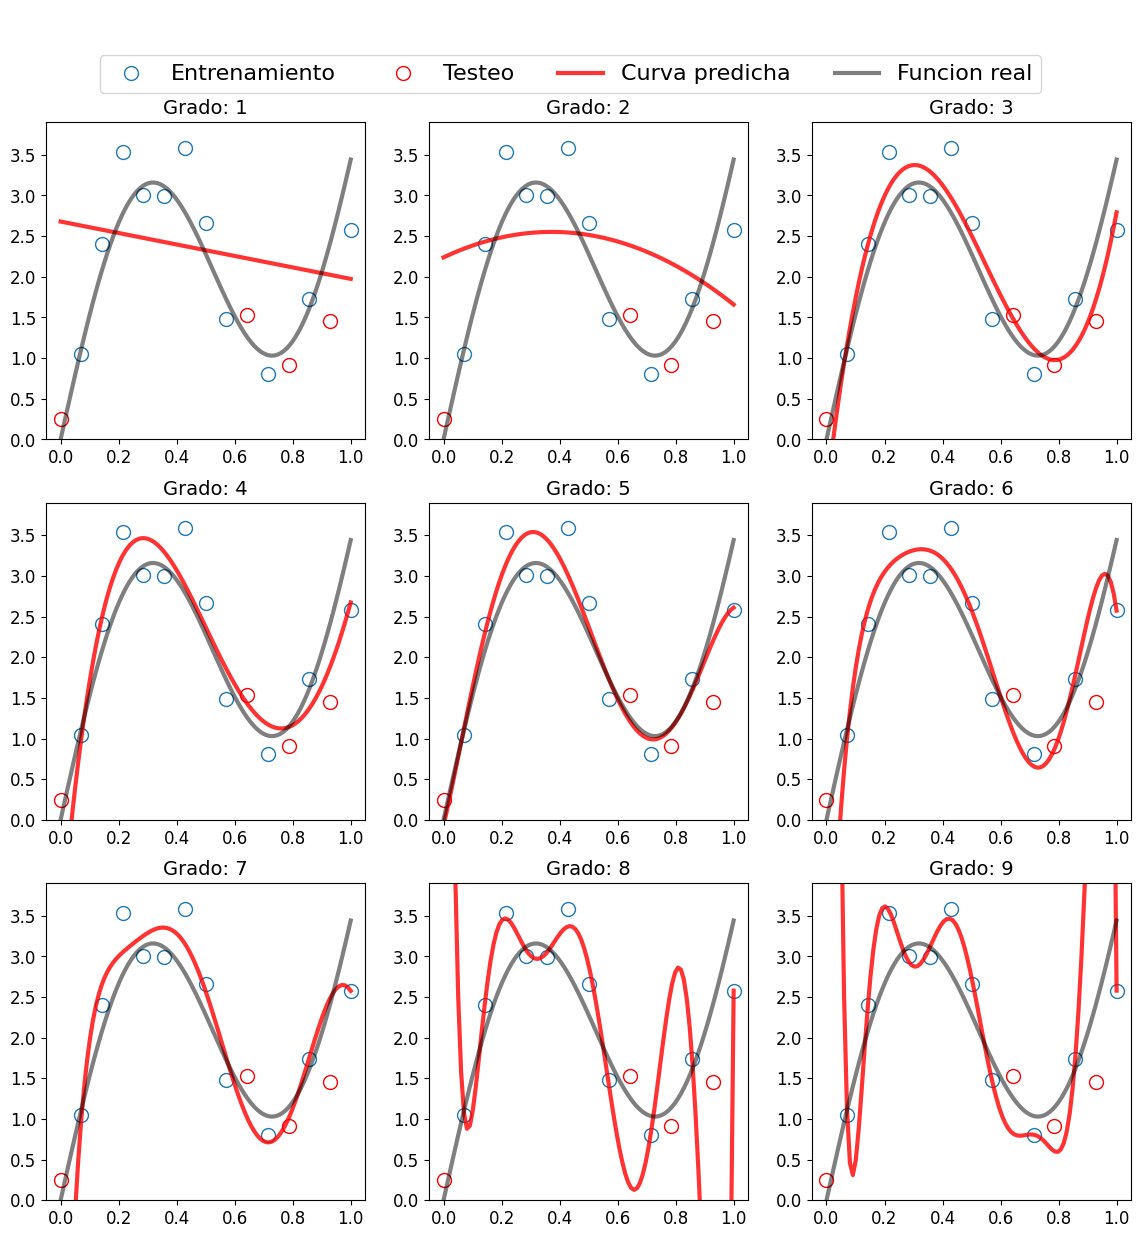

In [ ]:
# Hace multiples gráficas para los vários valores del orden del polinomio,
#con los valores de entrenamiento y los de testeo
ncolumns = 3

fig = plt.figure(figsize=(14, 14))

if len(models) % ncolumns == 0:
    extrarow = 0
else:
    extrarow = 1

axs = fig.subplots(ncols=ncolumns, nrows=int(np.floor(len(models)/ncolumns) + extrarow))

x_ = np.linspace(0,1, 100).reshape(-1,1)
for i, ax in zip(range(len(models)), axs.flatten()):
    ax.plot(x_train, t_train, 'o', ms=10, mfc='None', label='Entrenamiento')
    ax.plot(x_test, t_test, 'or', ms=10, mfc='None', label='Testeo')
    ax.plot(x_, models[i].predict(x_), 'r-', lw=3, alpha=0.8, label='Curva predicha')
    ax.plot(x_, ground_truth(x_), 'k-', lw=3, alpha=0.5, label='Funcion real')
    #
    ax.set_title('Grado: {}'.format(models[i]['poly_features'].degree), fontsize=14)
    #
    ax.set_ylim(0, 3.9)

# Misma leyenda para todos
handles, labels = ax.get_legend_handles_labels()
_ = fig.legend(handles, labels, loc='upper center', ncol=len(handles),
               fontsize=16, borderaxespad=2.5)

## Conclusión y pregunta
Vimos que el polinomio de menor error de prueba (o sea, menor error cuando el modelo ajustado con el conjunto de entrenamiento se usa para realizar predicciones sobre el conjunto de prueba) era el de grado cinco. Mirando a las curvas, parece ser el que mejor se aproxima del processo verdadero.

Ahora, en este caso *sabemos* que el proceso real no puede ser completamente representado por un polinomio con grado finito. ¿Habrá una forma de dar más flexibilidad al algoritmo y todavía evitar el sobreajuste (_overfitting_)? Para llevar eso a cabo necesitamos agregar información al modelo (teorema "no hay almuerzo grátis").

**De eso se trata la regularización:** agregar uno o más hiperparámetro(s) que eviten el sobreajuste, manteniendo los grados de libertad del modelo.

# Regularización

## Motivación empírica

El sobreajuste (_overfitting_) es una consecuencia de intentar minimizar la función error usando modelos muy flexible. Parece claro que un camino para mejorar sería modificando de alguna forma la función error.

Escribamos:

$$
MSE(\boldsymbol{\omega}) = \frac{1}{2} \sum_{i=1}^{N} \left\{y(x_i, \boldsymbol{\omega}) - t_i\right\}^2\;\;.
$$

**¿Como deberíamos modificar esta expresión?**
Algunos indicios pueden ser obtenidos al mirar los valores de los parámetros de la regresión polinomial.

In [ ]:
import pandas as pd
coef = np.full((len(models)+1, len(models)), np.nan)
for i in range(len(models)):
    coef[:i+2, i] = models[i]['regressor'].coef_[0]

coef_df = pd.DataFrame(coef, columns=range(1, len(models)+1))
coef_df
#En la tabla las columnas son el grado del polinomio y las filas los coeficientes

,1,2,3,4,5,6,7,8,9
0,2.349173,2.530699,2.733948,2.611936,2.680840,2.847963,2.880707,3.261468,3.208102
1,-0.199672,-0.122344,-1.891045,-2.074940,-2.572736,-2.093753,-2.402616,-2.052577,-3.165373
2,NaN,-0.181526,-0.796496,-0.359546,-0.850741,-2.306907,-2.774415,-10.014646,-9.028619
3,NaN,NaN,0.966508,1.131844,1.927967,0.662378,1.731268,-2.722915,7.973772
4,NaN,NaN,NaN,-0.183419,0.098223,1.757417,2.511221,19.313115,19.932867
5,NaN,NaN,NaN,NaN,-0.266819,0.287517,-0.638983,6.140175,-14.402005
6,NaN,NaN,NaN,NaN,NaN,-0.482053,-0.753889,-12.606694,-16.091781
7,NaN,NaN,NaN,NaN,NaN,NaN,0.234181,-2.136439,10.742246
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.595368,4.108910
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.552192


***
**Preguntas**

* ¿Qué vemos aquí? ¿Cómo cambia la magnitud de los coeficientes a medida que aumentamos el grado del polinomio?

Podemos ver los 10 términos del polinomio de grado 9 con distintos colores:

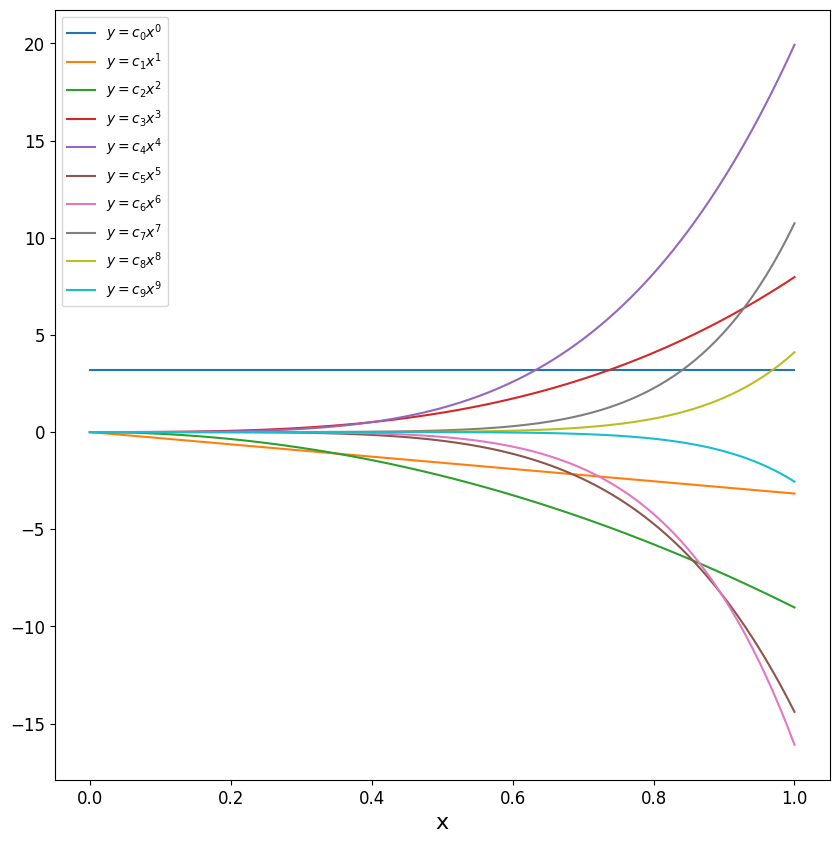

In [ ]:
# Perform multi-plot

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
xplot = np.linspace(0, 1, 100, endpoint = True)
for i  in range(10):
    plt.plot(xplot, models[8]['regressor'].coef_[0][i]*xplot**i, label='$y = c_{i}x^{i}$'.format(i=i))
plt.legend(loc='best')

plt.xlabel('x', fontsize=16)


plt.show()


## Regresión contraída (_Ridge regression_)

### Función de error modificada

El hecho de que los coeficientes aumentan abruptamente cuando empezamos a sobreajustar nos da una idea de incluir una penalización para valores grandes de los parámetros. Una forma de implementar eso es agregar un nuevo término a la función error:

$$
E_\text{ridge}(\boldsymbol{\omega}; \lambda) = \frac{1}{2} \sum_{i=1}^{N} \left\{y(x_i, \boldsymbol{\omega}) - t_i\right\}^2
 + \frac{\lambda}{2} \sum_{i=1}^M \omega_i^2\;\;.
$$
El nuevo término es llamado de término de regularización (o penalización). La parte que multiplica $\lambda/2$ es el cuadrado de la normal del vector de parámetros,

$$
||\boldsymbol{\omega}||^2 = \boldsymbol{\omega}^T \boldsymbol{\omega} = \left(\omega_1 \ldots \omega_M\right)\begin{pmatrix}\omega_1 \\ \vdots \\ \omega_M\end{pmatrix} = \sum_{i=1}^M \omega_i^2\;\;.
$$

**El parámetro de regularización $\lambda$ constituye un *nuevo hiperparámetro del modelo.***

Con ese nuevo término, vemos que valores muy grandes de los parámetros serán penalizados (acuérdense que tenemos que minimizar _E_). Una de las grandes ventajas matemáticas de esa regresión, que se conoce por **regresión contraída** (o *Ridge regression*), es que todavía se puede encontrar una solución analítica para encontrar los parámetros que minimizan el error modificado.

Eso es una consecuencia directa del uso de la norma $L2$, que no es nada más que la suma de los cuadrados de los parámetros del modelo.

Veamos cómo funciona en la práctica.

**Vamos a ajustar nuevamente un polinomio de grado 9 a los mismos datos, pero ahora usando un regresor regularizado**.

* exploren la documentación de `Ridge` llamando `Ridge?` o `help(Ridge)`. Vean que la API para ese estimador es __exactamente la misma__ que para la regresión lineal `LinearRegression`


In [ ]:
from sklearn.linear_model import Ridge

* creamos la función `ridge` que genera un objeto `Pipeline` análogo al regresor polinómico  (`polynomial_regressor`) anterior, pero implementando la regresión de ridge.

In [ ]:
def ridge(m, lam):
    """
    Construye un pipeline para la regresión contraída
    :param int m: grado del polinomio de las características
    :param float ll: coeficiente de regularización lambda
    atención: la función ridge toma como argumento alpha = lambda/2
    """
    return Pipeline([('poly_features', PolynomialFeatures(degree=m)),
                     ('regressor', Ridge(alpha=lam/2.0,fit_intercept=False))])

* instancia el pipeline para ejecutar una regesión con polinomio de grado 9 con lambda = 0.001 y la usa para a ajustar los datos del ejemplo.

In [ ]:
ridge_pipe = ridge(9,0.001)
ridge_pipe.fit(x_train,t_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=9)),
                ('regressor', Ridge(alpha=0.0005, fit_intercept=False))])

* Hace la gráfica de los resultados: datos, predicción del modelo, modelo subyacente/Real
(_ground truth_)

<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-1287545932.py:8: SyntaxWarning: invalid escape sequence '\l'
  ax.set_title('Grado: {}; $\lambda$: {:.2e}'.format(ridge_pipe['poly_features'].degree,


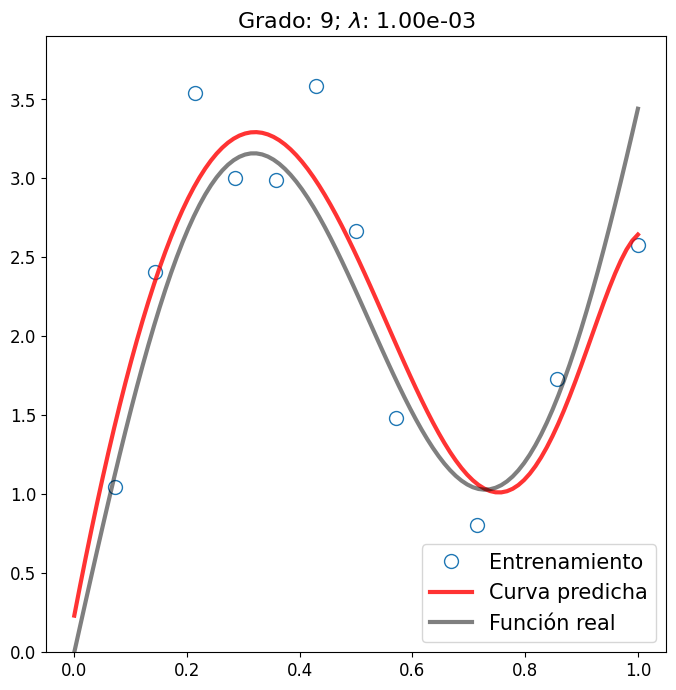

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

ax.plot(x_train, t_train, 'o', ms=10, mfc='None', label='Entrenamiento')
ax.plot(x_, ridge_pipe.predict(x_), 'r-', lw=3, alpha=0.8, label='Curva predicha')
ax.plot(x_, ground_truth(x_), 'k-', lw=3, alpha=0.5, label='Función real')
    #
ax.set_title('Grado: {}; $\lambda$: {:.2e}'.format(ridge_pipe['poly_features'].degree,
                                                    ridge_pipe['regressor'].alpha *2), fontsize=16)
    #
ax.set_ylim(0, 3.9)
ax.legend(loc=0, fontsize=15)

**Pregunta**: compare el modelo ajustado con el modelo correspondiente sin regularización (ver las gráficas de arriba).

Gracias al término de regularización, la curva es mucho menos oscilatoria y nos da una impresión de una generalización mejor.
Esto puede ser cuantificado usando el error cuadrático medio (MSE) en el conjunto de prueba.

In [ ]:
print('OLS; grado 9')
print('El MSE del entrenamiento es: {:.2f}'.format(train_errors[-1]))
print('El MSE del conjunto de prueba es: {:.2f}'.format(test_errors[-1]))
print('####')
print('Regresión contraída; grado {}, lambda = {}'.format(ridge_pipe['poly_features'].degree,
                                                        ridge_pipe['regressor'].alpha *2))
train_e, test_e = compute_errors(ridge_pipe, x_train, t_train, x_test, t_test, print_result=True)

OLS; grado 9
El MSE del entrenamiento es: 0.00
El MSE del conjunto de prueba es: 566.14
####
Regresión contraída; grado 9, lambda = 0.001
El MSE en el entrenamiento es: 0.12
El MSE en el testeo es: 0.12


**Pregunta**. ¿Eso significa que estamos efectivamente usando un polinonio con menor grado?

Trate de responder a esa pregunta mostrando en la pantalla los coeficientes de este ajuste.


In [ ]:
ridge_pipe['regressor'].coef_

array([ 2.29382243,  0.29428628, -0.45457811, -0.4682996 , -0.28786284,
       -0.0911954 ,  0.07551098,  0.20627284,  0.30598265,  0.38135832])

**Ejectue código abajo** para ver como queda la evolución de los valores de los parámetros de un modelo polinómico de grado 9 cuando vamos de valores bajos a valores altos del término de penalización.

In [ ]:
# conjunto de valores de lambda (espaciados de forma logarítmica entre -5 y 0)
lls = np.logspace(-5, 0, 100)

cc = []

# Itera sobre los valores, ajusta y graba los valores de los coeficientes
for ll in lls:
    # Create model
    ridge_pipe = ridge(9, ll)
    ridge_pipe.fit(x_train,t_train)

    # Recupera los valores de los coeficientes y agrega a la lista cc
    cc.append(ridge_pipe['regressor'].coef_)

cc = np.array(cc)

Exploren los valores de los parámetros. Pueden imprimirlos o hacer gráficos con la ayuda del código abajo.

<>:6: SyntaxWarning: invalid escape sequence '\o'
<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\o'
<>:8: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-2214433062.py:6: SyntaxWarning: invalid escape sequence '\o'
  ax.semilogx(lls, cc[:, i], label='$\omega_{{{}}}$'.format(i), lw=3, alpha=0.6)
/tmp/ipython-input-2214433062.py:8: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$\lambda$')


Text(0, 0.5, 'Valor del parámetro')

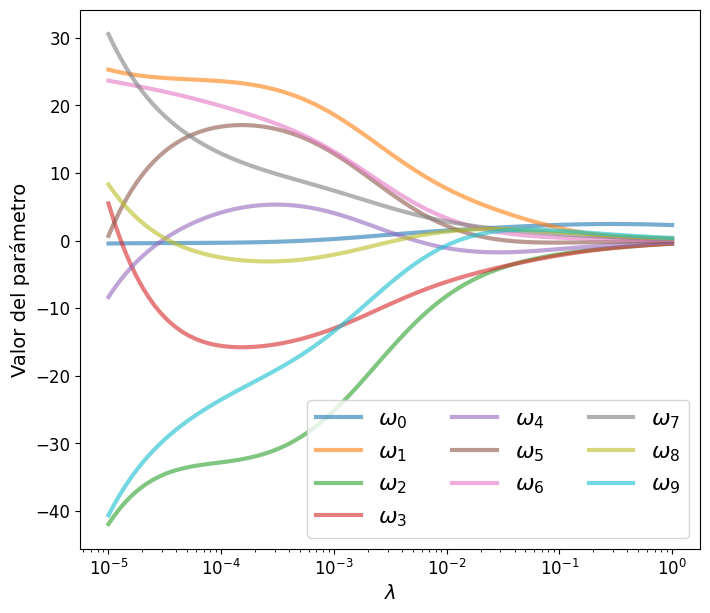

In [ ]:
# Valores de los coeficintes versus el parámetro de renormalización.
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)

for i in range(len(cc[0])):
    ax.semilogx(lls, cc[:, i], label='$\omega_{{{}}}$'.format(i), lw=3, alpha=0.6)
ax.legend(ncol=3, fontsize=16)
ax.set_xlabel('$\lambda$')
ax.set_ylabel('Valor del parámetro')

***

## Lasso

Otra regresión regularizada que se utiliza a menudo es la regresión **LASSO (_least absolute shrinkage and selection operator_ / operador de reducción y selección mínima absoluta)**, que selecciona de forma natural las variables más relevantes y produce modelos más parsimoniosos.

En lugar de penalizar la función de error utilizando la suma de los cuadrados de los parámetros del modelo, como en el caso anterior, **LASSO** explota la norma $l1$, que es simplemente la suma de los *valores absolutos* de los parámetros del modelo.

En otras palabras, la norma $l1$ de un vector es, simplemente:

$$
||\boldsymbol{\omega}||_1 = \sum_i |\omega_i|\;\;.
$$

La función de error modificada es, por lo tanto,
$$
E_\text{lasso}(\boldsymbol{\omega}; \lambda) = \frac{1}{2} \sum_{i=1}^{N} \left\{y(x_i, \boldsymbol{\omega}) - t_i\right\}^2
 + \frac{\lambda}{2} \sum_{i=1}^M |\omega_i|\;\;,
$$
donde nuevamente introducimos el hiperparámetro $\lambda$ para controlar el nivel de penalización.

### Adiós soluciones analíticas

La primera consecuencia de esta elección de la penalización es que la función de error ya no puede optimizarse (minimizarse) analíticamente. Es necesario recurrir, entonces, a diferentes algoritmos iterativos.

En `sklearn`, hay dos implementaciones:

* `linear_model.Lasso` usa *descenso por coordenadas* para encontrar el mínimo de la función de error.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Coordinate_descent.svg/500px-Coordinate_descent.svg.png" width=500px></img>

* `linear_model.LassoLars` utiliza LARS (regresión de ángulo mínimo / _least angle regression_), estrechamente relacionado con _forward stepwise regression_ (es decir, todos los coeficientes comienzan en cero, $\boldsymbol{\omega} = 0$, y se incrementan progresivamente). Pueden leer más en la [documentación de scikit-learn](https://scikit-learn.org/stable/modules/linear_model.html#least-angle-regression)


### Implementación

Importen `Lasso` y `LassoLars` y exploren su documentación y argumentos. ¿Cuáles son los parámetros que están asociados al procedimiento de optimización?

In [ ]:
from sklearn.linear_model import Lasso, LassoLars

Creen una función `lasso` tal y como hicimos para la regresión de _ridge_. Elijan una implementación de LASSO. Pueden ver los parámetros de Lasso utilizando `Lasso?`.

In [ ]:
Lasso?

In [ ]:
def lasso(m, ll):
    return Pipeline([('poly_features', PolynomialFeatures(degree=m)),
                     ('regressor', Lasso(alpha=ll/2.0, fit_intercept=False, max_iter=500000))])

Utilicen esto para ajustar los datos con *features* polinomiales de grado nueve. Utilicen el mismo parámetro de regularización que el anterior: 0.001.

In [ ]:
lasso_pipe = lasso(9, 0.01)
lasso_pipe.fit(x_train, t_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=9)),
                ('regressor',
                 Lasso(alpha=0.005, fit_intercept=False, max_iter=500000))])

Grafiquen los resultados con la ayuda del código de abajo.

<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-572795316.py:7: SyntaxWarning: invalid escape sequence '\l'
  ax.set_title('Grado: {}; $\lambda$: {:.2e}'.format(lasso_pipe['poly_features'].degree,


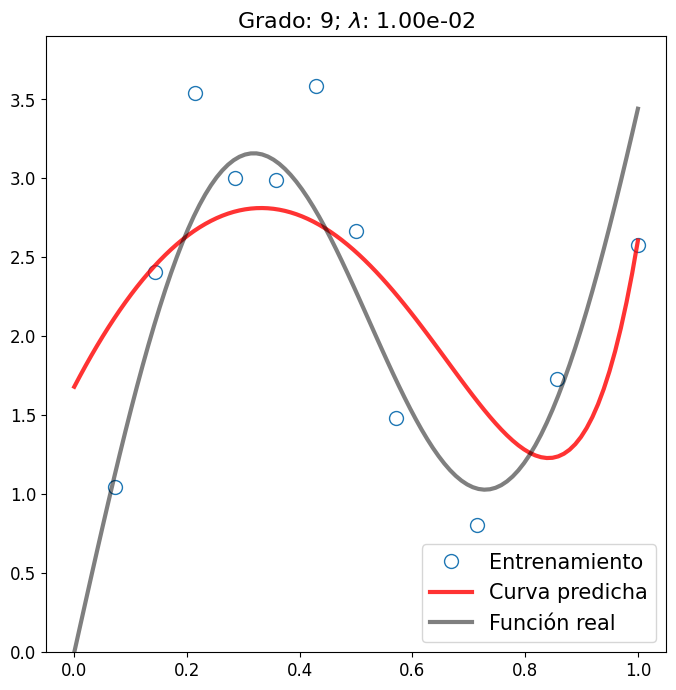

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.plot(x_train, t_train, 'o', ms=10, mfc='None', label='Entrenamiento')
ax.plot(x_, lasso_pipe.predict(x_), 'r-', lw=3, alpha=0.8, label='Curva predicha')
ax.plot(x_, ground_truth(x_), 'k-', lw=3, alpha=0.5, label='Función real')
    #
ax.set_title('Grado: {}; $\lambda$: {:.2e}'.format(lasso_pipe['poly_features'].degree,
                                                    lasso_pipe['regressor'].alpha *2), fontsize=16)
    #
ax.set_ylim(0, 3.9)
ax.legend(loc=0, fontsize=15)

A primera vista, parece que ambos regresores producen los mismos resultados. Pero en realidad hay una _gran diferencia_ entre ambos métodos.

**Compare los coeficientes encontrados con cada método**. Puede acceder a ellos

In [ ]:
ridge_pipe['regressor'].coef_

array([ 2.29382243,  0.29428628, -0.45457811, -0.4682996 , -0.28786284,
       -0.0911954 ,  0.07551098,  0.20627284,  0.30598265,  0.38135832])

In [ ]:
lasso_pipe['regressor'].coef_

array([  1.68118099,   6.8356093 , -10.33062965,  -0.        ,
        -0.        ,   0.        ,   0.        ,   0.        ,
         4.42068089,   0.        ])

**Pregunta**. ¿Ven alguna diferencia?

# ¿Cómo elegir los hiperparámetros? Idea:
Hasta este punto se ha tomado un polinomio de cierto grado, pero ¿como sabemos si es óptimo?

Podemos usar el conjunto de prueba (_test set_) para saber cual es el grado óptimo *M* y el parámetro de regularización $\lambda$.

* Elegir algún método de regularización.
* Hacer un bucle sobre todos los hiperparámetros y evaluar performance en _test set_.
* Reportar la mejor métrica (MSE).

**Pregunta importante**: Creen que este valor será representativo para estimar la performance en datos no vistos?

Comencemos con la usual separación entre conjuntos de entrenamiento y testeo:

In [ ]:
# Limpiado
df_casas = df_filtro[(df_filtro.moneda=='USD') & (df_filtro['tipo_operac'] == 'Venta')]

# Elijo columnas que voy a conservar:
# 'habitaciones', 'dormitorios', 'baños', 'sup_total', 'sup_cubierta', 'precio'
df_casas = df_casas.dropna(subset=['habitaciones', 'precio', 'sup_total','sup_cubierta'])

# filtro valores irreales, outliers, etc.
df_casas = df_casas[(df_casas['sup_total'] < 500) & (df_casas['habitaciones'] < 8) &
                    (df_casas['sup_cubierta'] < 400)]

In [ ]:
# Separa Train y Test
from sklearn.model_selection import train_test_split

x_train, x_test, et_train, et_test = train_test_split(df_casas[['sup_total','sup_cubierta','habitaciones']], df_casas['precio'], random_state=42)

## Implementación
Definamos una función para construir la regresión de _Ridge_. En este caso va a ser recomendable usar el StandardScaler para estandarizar nuestros datos, pues tienen unidades distintas no comparables.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import Ridge

def ridge(m, ll):
    """
    Construye un pipeline para la regresión contraída (ridge regression)
    usamos un StandardScaler

    :param int m: grado del polinomio de las características
    :param float ll: coeficiente de regularización lambda

    Atención: la función ridge toma como argumento alpha = lambda/2
    """
    return Pipeline([('scaler', StandardScaler()),
                     ('poly_features', PolynomialFeatures(degree=m)),
                     ('regressor', Ridge(alpha=ll/2))])

Ahora pasemos sobre todos los $M$ (grados) y $\lambda$ (valor del regularizador), y evaluemos en el conjunto:

In [ ]:
from sklearn.metrics import mean_squared_error

# El espacio de búsqueda de lambdas tiene forma logarítmica
lambdas = [0.1, 1, 10, 100, 1000]

# Espacio de búsqueda de grados va de 1 a 6.
grados = [1, 2, 3, 4, 5, 6]

# En esta lista voy a ir guardando los MSE en el conjunto de test
errores_test = []

# Iteramos sobre todos los valores y los guardamos todos
# Esto es principalmente porque nos interesa en esta etapa entender el espacio de hiperparámetros
# En algunos casos, por tema de memoria y/o performance, es interesante solo mantener los mejores-k
for ll in lambdas:
    for m in grados:
        # Creo modelo
        rr = ridge(m, ll)
        # Lo ajusto al conjunto de entrenamiento
        rr.fit(x_train, et_train) #se entrena el modelo con el conj de entrenamiento

        # Calculamos el MSE en test y lo agregamos a la lista de errores
        errores = mean_squared_error(et_test, rr.predict(x_test))
        errores_test.append(errores)

# Redimensiono los errores en una matriz (para después visualizarlos)
errores_test = np.array(errores_test).reshape((len(lambdas), len(grados)))
errores_test

array([[4.12607595e+09, 5.54027083e+09, 5.96046648e+09, 4.00926944e+10,
        3.52526308e+10, 1.80793677e+11],
       [4.11164367e+09, 5.46172992e+09, 5.62650602e+09, 1.24150320e+10,
        1.75689887e+10, 3.29068861e+10],
       [4.02676352e+09, 5.10785612e+09, 5.06525801e+09, 6.94972925e+09,
        1.20227675e+10, 1.16360296e+10],
       [4.30432701e+09, 4.90510327e+09, 5.37181137e+09, 5.66393987e+09,
        6.49458466e+09, 8.52682380e+09],
       [9.60071169e+09, 9.02450244e+09, 6.15211979e+09, 6.39238097e+09,
        6.53107408e+09, 6.80653025e+09]])

Hagamos una breve exploración de los datos:

In [ ]:
df_casas.head()

,ad_type,l1,l2,l3,habitaciones,dormitorios,baños,sup_total,sup_cubierta,precio,moneda,título,tipo_propiedad,tipo_operac
113,Propiedad,Argentina,Capital Federal,Villa Urquiza,2.0,NaN,2.0,74.0,57.0,184000.0,USD,Valdenegro 3000 PB - U$D 184.000 - Tipo casa ...,Casa,Venta
114,Propiedad,Argentina,Capital Federal,Villa Urquiza,2.0,NaN,2.0,74.0,57.0,184000.0,USD,Valdenegro 3000 PB - U$D 184.000 - Tipo casa ...,Casa,Venta
115,Propiedad,Argentina,Capital Federal,Villa Urquiza,3.0,NaN,2.0,118.0,82.0,300000.0,USD,A Capdevila 3500 pb - U$D 300.000 - Tipo casa...,Casa,Venta
150,Propiedad,Argentina,Capital Federal,Villa Urquiza,2.0,NaN,1.0,93.0,81.0,145000.0,USD,Casa - Parque Chas,Casa,Venta
158,Propiedad,Argentina,Capital Federal,Villa Urquiza,3.0,NaN,1.0,80.0,62.0,210000.0,USD,Casa - Villa Urquiza,Casa,Venta


array([[<Axes: xlabel='habitaciones', ylabel='habitaciones'>,
        <Axes: xlabel='precio', ylabel='habitaciones'>,
        <Axes: xlabel='sup_total', ylabel='habitaciones'>,
        <Axes: xlabel='sup_cubierta', ylabel='habitaciones'>],
       [<Axes: xlabel='habitaciones', ylabel='precio'>,
        <Axes: xlabel='precio', ylabel='precio'>,
        <Axes: xlabel='sup_total', ylabel='precio'>,
        <Axes: xlabel='sup_cubierta', ylabel='precio'>],
       [<Axes: xlabel='habitaciones', ylabel='sup_total'>,
        <Axes: xlabel='precio', ylabel='sup_total'>,
        <Axes: xlabel='sup_total', ylabel='sup_total'>,
        <Axes: xlabel='sup_cubierta', ylabel='sup_total'>],
       [<Axes: xlabel='habitaciones', ylabel='sup_cubierta'>,
        <Axes: xlabel='precio', ylabel='sup_cubierta'>,
        <Axes: xlabel='sup_total', ylabel='sup_cubierta'>,
        <Axes: xlabel='sup_cubierta', ylabel='sup_cubierta'>]],
      dtype=object)

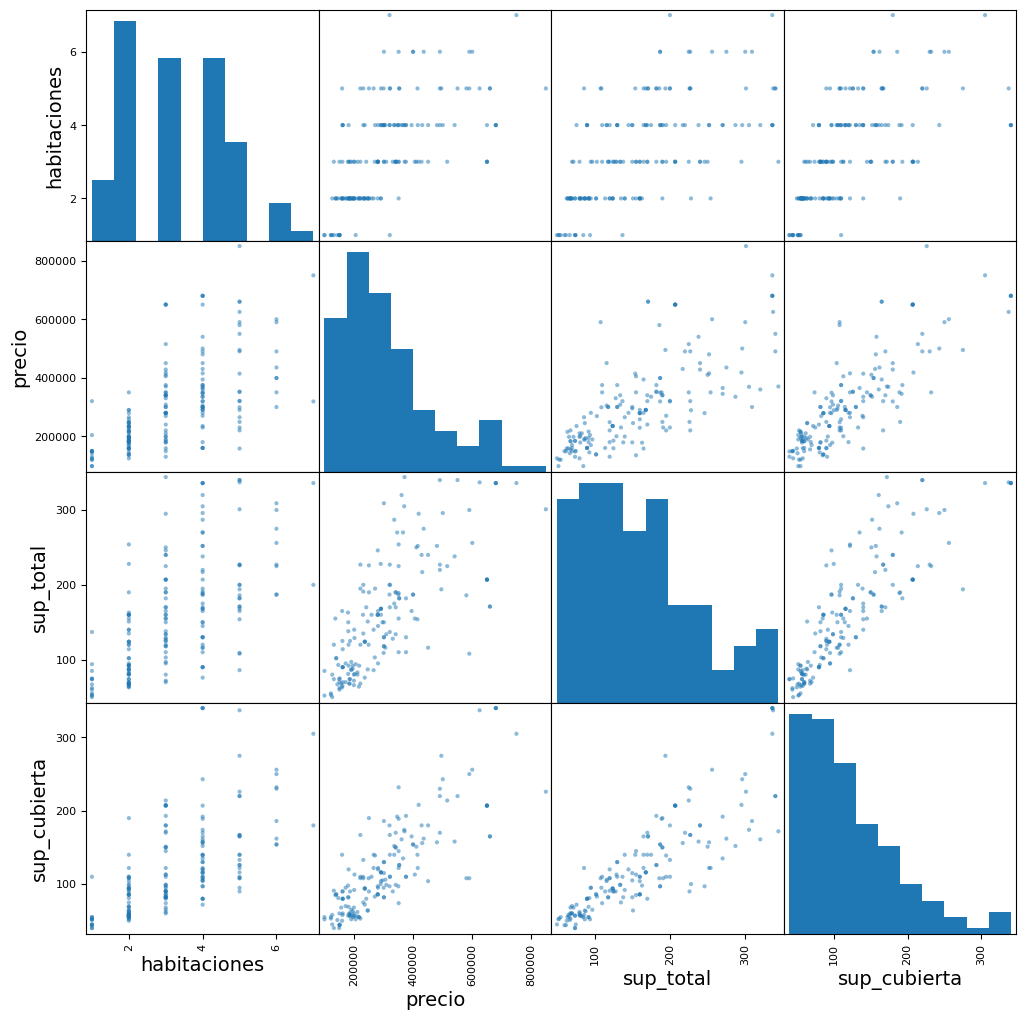

In [ ]:
pd.plotting.scatter_matrix(df_casas[['habitaciones', 'precio', 'sup_total','sup_cubierta']], figsize=(12, 12), alpha=0.5)

Los MSE están en las unidades (al cuadrado) de los precios de las viviendas (miles de dólares), así que para visualizarlos nos conviene tomarles la raíz cuadrada, y dividir por 1000:

In [ ]:
# Tomo raiz cuadrada del MSE y divido por 1000 para expresar el error en miles de dólares
errores_test_milusd = np.sqrt(errores_test)/1000
errores_test_milusd

array([[ 64.23453864,  74.43299556,  77.20405738, 200.23160189,
        187.75683957, 425.19839776],
       [ 64.1220997 ,  73.90351766,  75.01003944, 111.4227623 ,
        132.548062  , 181.40255268],
       [ 63.45678467,  71.46926699,  71.17062601,  83.36503613,
        109.64838121, 107.87042968],
       [ 65.60737009,  70.03644242,  73.29264202,  75.25915138,
         80.58898599,  92.34080248],
       [ 97.98322149,  94.99738121,  78.43544985,  79.9523669 ,
         80.81506095,  82.50169848]])

Hagamos una gráfica del MSE como función de $M$ y $\lambda$ como una imagen. Aquí usamos la función `plt.pcolor`.

<>:21: SyntaxWarning: invalid escape sequence '\l'
<>:21: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-2169155510.py:21: SyntaxWarning: invalid escape sequence '\l'
  ax.set_ylabel('Regularizador ($\lambda$)', fontsize=18)


Text(0, 0.5, 'Regularizador ($\\lambda$)')

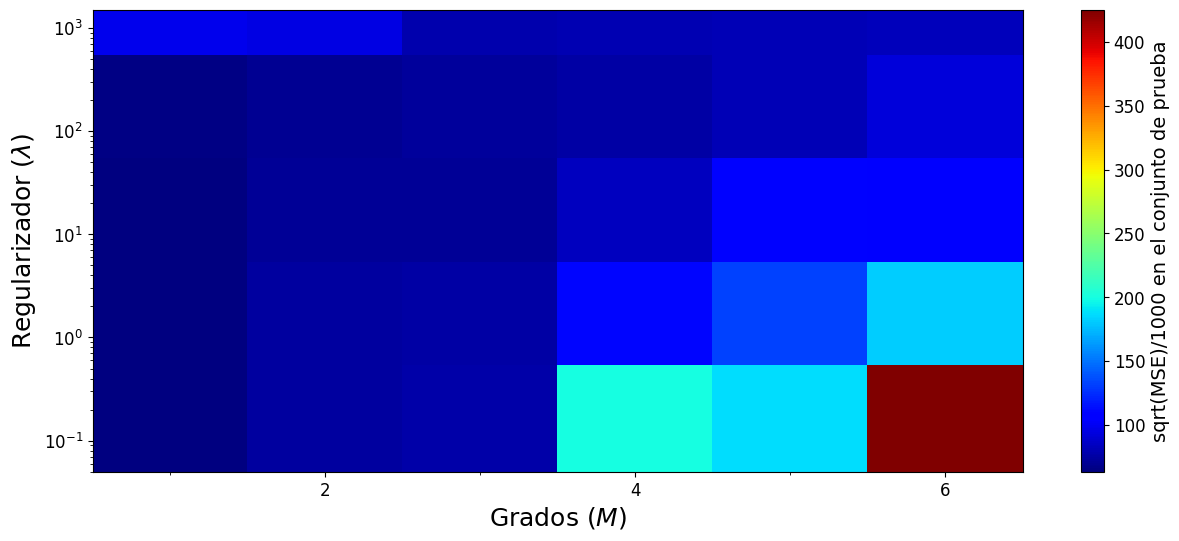

In [ ]:
# Valores de los ejes
Xp, Yp = np.meshgrid(grados, lambdas)
Zp = errores_test_milusd

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111)
# Grafico
pcol = plt.pcolor(Xp, Yp, Zp, cmap='jet')

# Usamos escala logarítmica para lambda
ax.set_yscale('log')
ax.set_ylim(0.05,1500)

# Define las marcas del eje x en números enteros
ax.xaxis.set_major_locator(plt.MultipleLocator(2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))

# Barra de colores y rótulos
plt.colorbar(pcol, label='sqrt(MSE)/1000 en el conjunto de prueba')
ax.set_xlabel('Grados ($M$)', fontsize=18)
ax.set_ylabel('Regularizador ($\lambda$)', fontsize=18)

Veamos cual es la posición del mínimo

In [ ]:
position = np.argmin(Zp)

mejor_grado = Xp.flatten()[position]
mejor_lambda = Yp.flatten()[position]
mejor_MSE = errores_test.flatten()[position]

print("M = {}".format(mejor_grado))
print("Lambda = {:.2e}".format(mejor_lambda))
print("MSE = {}".format(mejor_MSE))

M = 1
Lambda = 1.00e+01
MSE = 4026763520.101772


¡Hemos encontrado la _mejor_ combinación de $M$ y $\lambda$! ¿O hicimos algo mal?

Consideremos algunas **preguntas**:

* ¿Qué MSE esperamos en **datos nunca vistos**? ¿No estaremos en cierta manera sobreajustando a los datos de testeo?
* ¿Cambiará nuestro resultado si alteramos el corte de train/test?
* ¿Cuántos hiperparámetros distintos probamos?
***

# Validación
## Dataset apartado de validación
Para poder objetivamente asegurarnos la performance de nuestro modelo (sobre todo en el caso en que no conocemos la distribución real) en  **datos nuevos nunca vistos** debemos limitarnos y no mirar el conjunto de test. De otra manera sobreajustaremos al conjunto de test y no nos servirá como estimador de la performance real.
Por otro lado, para buscar mejores hiperparámetros (parámetros que generalicen mejor a datos _no-vistos_) debemos hacerlo sobre puntos fuera del entrenamiento. Una solución sería mantener un conjunto para _entrenar_ otro para _validar_ hiperparámetros. Y otro más para tener un valor no sesgado de la performance de nuestro modelo.

A veces el conjunto de *entrenamiento* + *validación* se denomina conjunto de *desarrollo*.

El corte final sería así

<img src="https://upload.wikimedia.org/wikipedia/commons/b/bb/ML_dataset_training_validation_test_sets.png" width=600/>


* Conjunto de Entrenamiento/Train: donde ajustamos el modelo.
* Conjunto de Validación: Donde evaluamos el modelo y lo usamos para escoger mejores hiperparámetros/características etc.
* Conjunto de Prueba/Test: Lo usamos solamente **al final** del desarrollo para establecer la performance esperada del modelo en datos nuevos.

In [ ]:
#Separación dataset en: train, test y validación

# Primero separamos el train y test
from sklearn.model_selection import train_test_split
x_train_full, x_test, e_train_full, e_test = train_test_split(df_casas[['sup_total','sup_cubierta','habitaciones']], df_casas['precio'], random_state=42)

# Segundo, separamos nuevamente en entrenamiento pero también en conjunto de validación, los train_full
x_train, x_val, e_train, e_val = train_test_split(x_train_full, e_train_full, random_state=42)

Corremos las mismas rondas que antes pero ahora evaluando en validación.

In [ ]:
# El espacio de búsqueda de lambdas tiene forma logarítmica
lambdas = [0.1, 1, 10, 100, 1000]

# Espacio de búsqueda de grados va de 1 a 6.
grados = [1, 2, 3, 4, 5, 6]

# En esta lista voy a ir guardando los MSE
errores_validacion = []

for ll in lambdas:
    for m in grados:
        # Creo modelo
        rr = ridge(m, ll)
        # Lo ajusto al conjunto de entrenamiento
        rr.fit(x_train, e_train) #se entrena con el conjunto de entrenamiento

        # Calculamos el MSE en validacion y lo agregamos a la lista de errores
        errores = mean_squared_error(e_val, rr.predict(x_val)) #se evalúa con el conjunto de validación
        errores_validacion.append(errores)

# Redimensiono los errores en una matriz (para después visualizarlos), reshape: lo convierte en una matriz de tamaño len(lambdas) x len(grados)
errores_validacion = np.array(errores_validacion).reshape((len(lambdas), len(grados)))
errores_validacion

array([[1.75205392e+10, 1.68727993e+10, 2.05470988e+10, 7.34694720e+10,
        2.89302060e+10, 4.16111765e+11],
       [1.75361833e+10, 1.69411325e+10, 2.01367546e+10, 4.78811529e+10,
        4.42081744e+10, 1.17818702e+11],
       [1.76557982e+10, 1.73176516e+10, 2.03851961e+10, 2.61855194e+10,
        3.87130978e+10, 1.28888431e+11],
       [1.82637698e+10, 1.87506797e+10, 2.17895625e+10, 2.16368400e+10,
        2.35951528e+10, 6.29565650e+10],
       [2.43344757e+10, 2.54015214e+10, 2.39586317e+10, 2.39944177e+10,
        2.83637868e+10, 4.09436721e+10]])

Ahora podemos elegir los mejores hipérparametros usando la performance en set de validación.

In [ ]:
position = np.argmin(errores_validacion)# posición del menor error

mejor_grado_val = grados[position%len(grados)]
mejor_lambda_val = lambdas[position//len(lambdas)]
mejor_MES_val = errores_validacion.flatten()[position]

print("Grado (M) = {}".format(mejor_grado_val))
print("Lambda = {:.2e}".format(mejor_lambda_val))
print("MSE = {:.2f}".format(mejor_MES_val))

Grado (M) = 2
Lambda = 1.00e-01
MSE = 16872799332.33


Y ahora usamos el dataset de test para ver la generalización a datos nuevos. Vamos a usar los hiperparámetros que acabamos de determinar con la validación:

In [ ]:
# Primero instanciamos el modelo
mejor_ridge_val = ridge(mejor_grado_val, mejor_lambda_val)

# Luego entrenamos nuevamente
mejor_ridge_val.fit(x_train, e_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_features', PolynomialFeatures()),
                ('regressor', Ridge(alpha=0.05))])

Y evaluamos el MSE en el conjunto de testeo

In [ ]:
y_test = mejor_ridge_val.predict(x_test)
print('Error de TEST final: {:.2f}'.format(mean_squared_error(e_test, y_test)))#corregido antes decía y_test por eso daba cero

Error de TEST final: 4707585686.11


Después de haber encontrado los _mejores_ hiperparámetros, se puede hacer un modelo final entrenando con toda la data.

In [ ]:
mejor_ridge_val = ridge(mejor_grado_val, mejor_lambda_val)
mejor_ridge_val.fit(x_train_full, e_train_full)

y_test = mejor_ridge_val.predict(x_test)
MSE_mejor_val = mean_squared_error(e_test, y_test)

print('Error de TEST final: {:.2f}'.format(MSE_mejor_val))

Error de TEST final: 5540270827.36


**Preguntas y ejercicios**

* ¿Qué percances hay en este procedimiento?

* ¿Cómo funcionaría mejor este método? ¿Con datasets grandes o chicos?

* Otra posibilidad sería tomar los k-mejores hiperparámetros, ya que hay varios hiperparámetros cerca del mínimo. Pero lamentablemente no sabemos cuánto score podemos estar perdiendo hasta ahora al hacer esto.

* Esto no nos sirve para identificar fluctuaciones aleatorias en la métrica. Es decir cuando ciertos hipérpametros tienen la suerte de ser mejores en validación pero no en el caso general. ¿Qué podemos hacer para estimar esto?

## Validación cruzada con K-Folding
Para resolver el problema anterior usamos _Validación Cruzada_. Consiste en entrenar sobre distintos cortes de entrenamiento y validación. De esta manera conseguimos una muestra de la distribución de performance de los hiperparámetros de distintos datasets. Entonces, podemos computar la varianza y la media de la performance, y elegir así el mejor hiperparámetro

¡Importante! La validación cruzada debe cumplir:
* Cada modelo debe ser entrenado en un corte particular de entrenamiento/validación (Lo llamaremos un _Fold_), para que sean lo más independiente posibles.
* Los datasets de validación deben tener intersección nula. Es decir no tener datos en común. De esta forma evitamos la posibilidad de tener correlaciones espurias entre las métricas y sobreajustar a un conjunto particular de puntos.

La forma más utilizada de hacer esto es _K-Fold Cross-Validation_, o validación cruzada con k cortes. Consiste en dividir el conjunto de desarrollo en K conjuntos e iterativamente usar K-1 para entrenar y el restante para validar. Luego de haber iterado sobre todos los cortes tendremos k mediciones distintas de la performance. Al elegir conjuntos con intersección nula (sin elementos en común) nos aseguramos que cada medición está descorrelacionada.


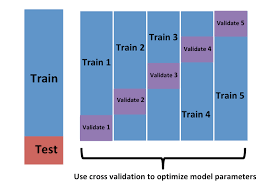

Esta técnica ya está implementada en `sklearn`. Definimos el número de Folds (cortes)  $K$ con el argumento `cv=`, y el score a usar con  `scoring=`.

**NOTA:**  mientras que *error* es un valor para el cual  *menos es mejor* el *score* tiene el comportamiento opuesto: *cuanto más, mejor*. Por esto definimos `neg_mean_squared_error` que corresponde al valor negativo del error.

**Pensemos:**
* Revisemos mejor `cross_val_score` .
* ¿Cuál es la forma de los `scores`?
* ¿Cómo estimamos el MSE a partir de los `scores`?
* Compare  con los resultados anteriores de validación y test. Además, observe los valores individuales se `scores`. ¿Qué ve?

* Pista: ¿Qué dataset hay que pasar a `cross_val_score`. (`x,e`)`_train`? o (`x,e`)`_train_full`?

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score?

In [ ]:
model = ridge(mejor_grado_val, mejor_lambda_val)

scores = cross_val_score(model, x_train_full, e_train_full, cv=5, scoring='neg_mean_squared_error')
-scores

array([1.37702174e+10, 7.78306072e+09, 1.33714162e+10, 6.76999820e+09,
       5.23293520e+09])

In [ ]:
print(-scores.mean())
print(scores.std())

9385525547.691275
3514704267.8870296


Veamos ahora qué ocurre cuando hacemos una búsqueda en todo el espacio.

In [ ]:
# El espacio de búsqueda de lambdas tiene forma logarítmica
lambdas = [0.1, 1, 10, 100, 1000]

# Espacio de búsqueda de grados va de 1 a 6.
grados = [1, 2, 3, 4, 5, 6]

cv_errors = []
cv_std = []

for ll in lambdas:
    for m in grados:
        # Crea el modelo

        rr = ridge(m, ll)

        scores = cross_val_score(rr, x_train_full, e_train_full, cv=5, scoring='neg_mean_squared_error')

        cv_errors.append(-scores.mean())
        cv_std.append(scores.std())

cv_errors = np.array(cv_errors).reshape((len(lambdas), len(grados)))
cv_std = np.array(cv_std).reshape((len(lambdas), len(grados)))

<>:22: SyntaxWarning: invalid escape sequence '\l'
<>:22: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-1116063882.py:22: SyntaxWarning: invalid escape sequence '\l'
  ax.set_ylabel('Regularizador ($\lambda$)', fontsize=18)


Text(0, 0.5, 'Regularizador ($\\lambda$)')

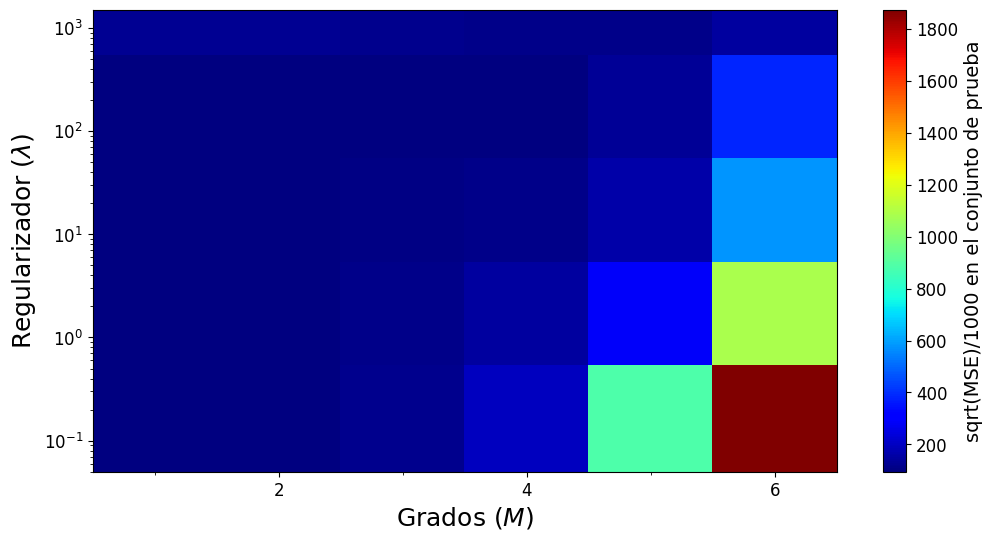

In [ ]:
# Valores de los ejes
Xp, Yp = np.meshgrid(grados, lambdas)
errores_cv_milusd = np.sqrt(cv_errors)/1000 # Expreso el errores en miles de usd
Zp = errores_cv_milusd

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
# Grafico
pcol = plt.pcolor(Xp, Yp, Zp, cmap='jet')

# Usamos escala logarítmica para lambda
ax.set_yscale('log')
ax.set_ylim(0.05,1500)

# Define las marcas del eje x en números enteros
ax.xaxis.set_major_locator(plt.MultipleLocator(2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))

# Barra de colores y rótulos
plt.colorbar(pcol, label='sqrt(MSE)/1000 en el conjunto de prueba')
ax.set_xlabel('Grados ($M$)', fontsize=18)
ax.set_ylabel('Regularizador ($\lambda$)', fontsize=18)

In [ ]:
position = np.argmin(cv_errors)

mejor_grado_cv = grados[position%len(grados)]
mejor_lambda_cv = lambdas[position//len(lambdas)]
MES_cv = cv_errors.flatten()[position]

print("Grado (M) = {}".format(mejor_grado_cv))
print("Lambda = {:.2e}".format(mejor_lambda_cv))
print("MSE = {:.2f}".format(MES_cv))
print("Std(MSE) = {:.2f}".format(cv_std.flatten()[position]))

Grado (M) = 1
Lambda = 1.00e+00
MSE = 8969402902.15
Std(MSE) = 3523369239.41


In [ ]:
mejor_ridge_cv = ridge(mejor_grado_cv, mejor_lambda_cv)
mejor_ridge_cv.fit(x_train_full, e_train_full)

y_test = mejor_ridge_cv.predict(x_test)
MSE_mejor_cv = mean_squared_error(y_test, e_test)
print('Error final TEST: {:.2f}'.format(MSE_mejor_cv))

Error final TEST: 4111643669.71


# Exploración automática del espacio de búsqueda
Elegir los mejores hiperparámetros es una etapa corriente en el desarrollo de un modelo. En general para esto se usan modelos de "caja-negra" pero existen meta-modelos que también se pueden usar aunque implican cierto trabajo de adaptación a cada modelo. Las formas básicas de hacer esto usando sklearn son:
* `GridSearchCV`: El espacio de búsqueda se define con un diccionario de {hiper-parametro : valores}. Automáticamente genera una grilla con esos valores y pasa por todas las combinaciones.
* `RandomizedSearchCV:` Esta función recibe los mismos inputs que el caso anterior. Pero selecciona que combinaciones probar de manera aleatoria. No barre una por una. Tiene un parámetro `n_iter` que debemos fijar para que el modelo sepa cuándo debe dejar de probar puntos.

Veamos:

**Nota:** para acceder a los parámetros de cada paso o  _step_ en un pipeline, pueden acceder de la manera siguiente: `NombreDelPaso__NombreDelParametro` ( notar el doble `_` entre nombres). Si queremos ver el grado de PolynomialFeatures en el paso `poly_features`, debe escribir `poly_features__degree` en el diccionario de configuración.


## GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge

model = Pipeline([('scaler', StandardScaler()),
    ('polynomial', PolynomialFeatures()),
    ('regressor', Ridge(fit_intercept=False) )
])

# Definimos los parámetros para cada parte del pipeline. Separamos parámetro de nombre con  ‘__’:
parameters = {'polynomial__degree' : range(1, 10),
              'regressor__alpha': np.logspace(-2, 4, 100)}

grid_search = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

Ahora corremos `fit` para saber cuáles son los mejore hiperparámetros.

In [ ]:
grid_search.fit(x_train_full, e_train_full)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial', PolynomialFeatures()),
                                       ('regressor',
                                        Ridge(fit_intercept=False))]),
             n_jobs=-1,
             param_grid={'polynomial__degree': range(1, 10),
                         'regressor__alpha': array([1.00000000e-02, 1.14975700e-02, 1.32194115e-02, 1.51991108e-02,
       1.74752840e-02, 2.00923300e-02, 2.31012970e-02, 2.65608778e-0...
       4.03701726e+02, 4.64158883e+02, 5.33669923e+02, 6.13590727e+02,
       7.05480231e+02, 8.11130831e+02, 9.32603347e+02, 1.07226722e+03,
       1.23284674e+03, 1.41747416e+03, 1.62975083e+03, 1.87381742e+03,
       2.15443469e+03, 2.47707636e+03, 2.84803587e+03, 3.27454916e+03,
       3.76493581e+03, 4.32876128e+03, 4.97702356e+03, 5.72236766e+03,
       6.57933225e+03, 7.56463328e+03, 8.69749003e+03, 1.00000000e+04])},
             scoring='neg_mean_squared_error')

Los mejores hiperparámetros son:

In [ ]:
grid_search.best_params_

{'polynomial__degree': 1, 'regressor__alpha': np.float64(0.6579332246575682)}

El score (-MSE) es

In [ ]:
grid_search.best_score_

np.float64(-8966480867.395117)

Si queremos podemos recuperar toda la información de la optimización

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([0.01493831, 0.01847253, 0.02329016, 0.01920915, 0.01918564,
        0.01830597, 0.01377501, 0.01799974, 0.01152658, 0.0174592 ,
        0.0151475 , 0.00777631, 0.01512513, 0.00928817, 0.01441417,
        0.01203713, 0.01292782, 0.01147757, 0.01703219, 0.01251884,
        0.01838956, 0.01417212, 0.01711874, 0.01435924, 0.01648469,
        0.01708245, 0.01579542, 0.01851997, 0.01626487, 0.01599941,
        0.01810417, 0.0162478 , 0.01620035, 0.01751628, 0.01485124,
        0.01638885, 0.01936193, 0.01606536, 0.01815977, 0.01706862,
        0.0144556 , 0.01562562, 0.01713414, 0.01537457, 0.01680083,
        0.0121757 , 0.01335888, 0.01414609, 0.01723332, 0.01740217,
        0.01774874, 0.01531644, 0.00789051, 0.01504016, 0.01624618,
        0.01559191, 0.0113728 , 0.01938419, 0.01302586, 0.01098404,
        0.02334309, 0.01171241, 0.01225033, 0.02017698, 0.01968727,
        0.01814337, 0.01233907, 0.00992169, 0.00765638, 0.00963883,
        0.00882745, 0.01439137,

Si queremos, por ejemplo podemos guardar los resultados del GridSearch en un DataFrame usando los diccionario que entrega el `grid_search.cv_results_`

In [ ]:
cv_results = grid_search.cv_results_

In [ ]:
# Armo el dataframe
results_df = pd.DataFrame(cv_results)

# Selecciono solo las columnas que me interesan
columnas = ['param_polynomial__degree', 'param_regressor__alpha',
            'mean_test_score', 'std_test_score']
results_df = results_df[columnas]

In [ ]:
results_df.head()

,param_polynomial__degree,param_regressor__alpha,mean_test_score,std_test_score
0,1,0.010000,-8.972670e+09,3.545171e+09
1,1,0.011498,-8.972642e+09,3.545240e+09
2,1,0.013219,-8.972609e+09,3.545319e+09
3,1,0.015199,-8.972572e+09,3.545411e+09
4,1,0.017475,-8.972530e+09,3.545516e+09


EL mejor estimador se puede recuperar directamente aquí

In [ ]:
best_pr = grid_search.best_estimator_
best_pr

Pipeline(steps=[('scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(degree=1)),
                ('regressor',
                 Ridge(alpha=np.float64(0.6579332246575682),
                       fit_intercept=False))])

## RandomizedSearchCV
Cuando el espacio de búsqueda es muy grande es mejor recorrer sólo algunos puntos del espacio. `RandomizedSearchCV` nos permite hacer esto pasando el valores en todo el rango de nuestros parámetros. Automáticamente tomara puntos de prueba aleatorios en cada paso. También podemos pasarles distribuciones de los parámetros. Como siempre, ¡exploren la documentación!

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import LinearRegression

polinomial_model = Pipeline([('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures()),
    ('regressor', Ridge(fit_intercept=False) )
])

# los parámetros se setean por nombre y parametro con ‘__’ :
parameters = {'poly_features__degree' : np.arange(1,20),
              # observé que usamos funciones de scipy para definir el espacio de búsqueda
              'regressor__alpha' : np.logspace(-2, 8, 100)}

random_search = RandomizedSearchCV(polinomial_model, parameters, n_iter=40, random_state=42, scoring='neg_mean_squared_error', cv=5)

In [ ]:
random_search.fit(x_train_full, e_train_full)
random_search.best_params_, -random_search.best_score_

/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=3.26373e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=4.85396e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=4.50403e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=8.1424e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-p

({'regressor__alpha': np.float64(0.1291549665014884),
  'poly_features__degree': np.int64(2)},
 np.float64(9378266862.469412))